<h2 style='text-align:center;'><b> NYC Taxi & Limousine Commission</b></h1>
<h5 style="text-align: center;">Ardi Arunaditya JCDS 2604 - 021</h2>

 > # **Introduction**
---

### **Background**
The New York City Taxi and Limousine Commission (TLC) created in 1971, is the city agency responsible for regulating and licensing the for-hire transportation industry. This includes yellow taxis, green taxis (borough cabs), for-hire vehicles (like Uber and Lyft), commuter vans, and limousines. The TLC’s mission is to ensure that both passengers and drivers have access to safe, reliable, and accessible transportation while promoting sustainability and compliance with city laws. 

The NYC TLC consists of eight divisions, which is: Enforcement, Finance and Administration, IT(Information Technology), Legal Affairs, Licensing and Standards, Policy and External Affairs, Communication, and Safety and Emmisions. Together, these divisions form a comprehensive regulatory body that maintains the balance between innovation and tradition within NYC’s vast for-hire vehicle industry, ensuring that drivers, passengers, and businesses operate in a safe, fair, and efficient environment.

The Taxi and Limousine Commission (TLC) regulates the licensing of these vehicles to ensure safe and efficient transportation options for residents and visitors. However, the demand for taxi services varies significantly across different neighborhoods and times of day. In many areas, discrepancies exist between the number of licensed cabs and actual passenger demand, leading to inefficiencies such as long wait times for passengers and excessive downtime for drivers. This misalignment affects the overall quality of service provided to passengers, undermining the potential of the taxi system to meet the transportation needs of the community effectively.

### **Problem Question**
How can we pinpoint the pickup locations and the specific times in NYC where passenger demand peaks, to determine where more licensed cabs may be required and reduce the wait time for passenger?

### **Goals**
- **Identify Peak Passenger Location:** <br>
Determine which pick upboroughs and zones with the peak demands

- **Identify Peak Passenger by Time:** <br>
Determine which season, month, day, hour of day with the peak demands

- **Identify Peak Passenger Demand by Location and Time** <br>
Determine which location and in what time does passenger demand peaks.

- **Identify The Wait Time for Trip** <br>
Understand if high-demand areas also have longer or shorter trip durations, impacting driver availability and wait times.

> # **Data Wrangling**
---
The first step in the analysis involves thoroughly examining the dataset to gain a deeper understanding of the data being utilized. This includes identifying and addressing any missing data, transforming the data as needed to better suit the analysis, and incorporating additional relevant datasets, if necessary, to enhance the overall analysis.

This analysis will use the data from Green Taxi Trip Records in 2023.

## **Data Collection**

In [2166]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyarrow.parquet as pq
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("tab10")

import sys
sys.setrecursionlimit(10000)


Beside the data for Green Taxi Trip Records in January 2023, which is provided by Purwadhika, the data from February - December 2023, and data for the taxi zone are gathered from the official NYC TLC website, which can be accessed and downloaded here: [NYC TLC Trip Record Data page](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [2167]:
# Import data

jan = pd.read_csv(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\NYC TLC Trip Record.csv")

feb = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-02.parquet")
feb = feb.to_pandas()

mar = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-03.parquet")
mar = mar.to_pandas()

apr = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-04.parquet")
apr = apr.to_pandas()

may = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-05.parquet")
may = may.to_pandas()

jun = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-06.parquet")
jun = jun.to_pandas()

jul = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-07.parquet")
jul = jul.to_pandas()

aug = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-08.parquet")
aug = aug.to_pandas()

sep = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-09.parquet")
sep = sep.to_pandas()

oct = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-10.parquet")
oct = oct.to_pandas()

nov = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-11.parquet")
nov = nov.to_pandas()

dec = pq.read_table(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\Green Taxi Trip Record 2023\green_tripdata_2023-12.parquet")
dec = dec.to_pandas()

location = pd.read_csv(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 2\Capstone Project 2\taxi_zone_lookup.csv")

In [2168]:
trips2023 = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec], axis= 0)

In [2169]:
location.sample()

,LocationID,Borough,Zone,service_zone
1,2,Queens,Jamaica Bay,Boro Zone


In [2170]:
location["Borough"].value_counts()

Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Unknown           1
Name: count, dtype: int64

Here we can see that there is Unknown and EWR borough in the dataset. So, we are going drop those values first, because our analysis focuses on these boroughs: `Queens`, `Manhattan`, `Brooklyn`, `Bronx`, and `Staten Island`

In [2171]:
drop_loc = location[(location["Borough"] == "EWR") | (location["Borough"] == "Unknown")]
drop_loc

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
263,264,Unknown,NaN,NaN


In [2172]:
location.drop(drop_loc.index, inplace= True)
location["Borough"].value_counts()

Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Name: count, dtype: int64

In [2173]:
tripsCopy = trips2023.copy()
tripsCopy.sample()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
64008,2,2023-02-24 07:28:00,2023-02-24 07:49:00,None,NaN,42,18,NaN,6.76,22.4,0.0,0.0,0.0,0.0,NaN,1.0,23.4,NaN,NaN,NaN


In [2174]:
trips = pd.merge(tripsCopy, location.add_prefix("PU"), left_on="PULocationID", right_on="PULocationID", how="left")
trips = pd.merge(trips, location.add_prefix("DO"), left_on="DOLocationID", right_on="DOLocationID", how="left")

trips.sample(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
736798,2,2023-12-07 18:41:09,2023-12-07 18:50:32,N,1.0,95,28,1.0,1.56,11.4,2.5,0.5,0.0,0.0,NaN,1.0,15.4,2.0,1.0,0.0,Queens,Forest Hills,Boro Zone,Queens,Briarwood/Jamaica Hills,Boro Zone
531282,2,2023-09-03 09:55:32,2023-09-03 10:13:05,N,1.0,95,216,1.0,3.58,19.8,0.0,0.5,0.0,0.0,NaN,1.0,21.3,2.0,1.0,0.0,Queens,Forest Hills,Boro Zone,Queens,South Ozone Park,Boro Zone
159834,2,2023-03-13 06:47:53,2023-03-13 06:59:17,N,1.0,260,226,5.0,2.15,13.5,0.0,0.5,0.0,0.0,NaN,1.0,15.0,1.0,1.0,0.0,Queens,Woodside,Boro Zone,Queens,Sunnyside,Boro Zone


## **Data Inspection and Skimming**

In [2175]:
# Detailed Data Information
trips_desc = []

for i in trips.columns:
    trips_desc.append([i,
                    trips[i].dtypes,
                    trips[i].isna().sum(),
                    round((trips[i].isna().sum()/len(trips)*100),2),
                    trips[i].nunique(),
                    trips[i].unique()])

trips_deepInfo = pd.DataFrame(trips_desc, columns = ['Columns', 'data_type', 'null', 'null%', 'unique','Sample'])
print(len(trips_deepInfo))
trips_deepInfo

26


,Columns,data_type,null,null%,unique,Sample
0,VendorID,int64,0,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.00,767540,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0,0.00,767093,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,55613,7.07,2,"[N, Y, nan, None]"
4,RatecodeID,float64,55613,7.07,7,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan, 6.0]"
5,PULocationID,int64,0,0.00,253,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,0.00,260,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,55613,7.07,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,0.00,3964,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,0.00,7463,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


The key columns that are relevant for this analysis will be `lpep_pickup_datetime`, `lpep_dropoff_datetime`,`trip_distance`, `PUBorough`, and `PUZone`,

Further data wrangling and analysis will only be using these columns to streamline the data set and for efficiency.

In [2176]:
key = ["lpep_pickup_datetime", 
       "lpep_dropoff_datetime",  
       "PUBorough", 
       "PUZone", 
       "trip_distance"]

In [2177]:
df = pd.DataFrame(trips[key])
df.sample(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
334670,2023-05-31 20:22:44,2023-05-31 20:54:21,Bronx,West Concourse,4.75
670915,2023-11-06 21:04:07,2023-11-06 21:16:21,Queens,Jackson Heights,3.15
59562,2023-01-29 22:43:18,2023-01-29 22:44:24,NaN,NaN,0.00


### **Change the data types for pickup and dropoff datetime**

In [2178]:
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [2179]:
display(df.describe().T,
        df.describe(include= object).T)

,count,mean,min,25%,50%,75%,max,std
lpep_pickup_datetime,787060,2023-06-29 06:31:26.038536192,2008-12-31 22:41:41,2023-03-28 15:26:58.249999872,2023-06-25 11:29:55,2023-09-29 17:10:53,2023-12-31 23:59:19,NaN
lpep_dropoff_datetime,787060,2023-06-29 06:51:01.762350080,2008-12-31 23:01:41,2023-03-28 15:45:17.750000128,2023-06-25 11:43:01,2023-09-29 17:37:07,2024-01-01 14:56:28,NaN
trip_distance,787060.0,19.020025,0.0,1.15,1.92,3.47,278990.28,1039.99662


,count,unique,top,freq
PUBorough,784762,5,Manhattan,446368
PUZone,785498,250,East Harlem North,159159


### **Checking Missing Value**

In [2180]:
# Detailed Data Information
df_desc = []

for i in df.columns:
    df_desc.append([i,
                    df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].unique()])

df_deepInfo = pd.DataFrame(df_desc, columns = ['columns', 'data_type', 'null', 'null%', 'unique','sample'])
print(len(df_deepInfo.values))
df_deepInfo

5


,columns,data_type,null,null%,unique,sample
0,lpep_pickup_datetime,datetime64[ns],0,0.00,767539,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,datetime64[ns],0,0.00,767092,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,PUBorough,object,2298,0.29,5,"[Manhattan, Queens, Brooklyn, Bronx, nan, Stat..."
3,PUZone,object,1562,0.20,250,"[Morningside Heights, Bloomingdale, Steinway, ..."
4,trip_distance,float64,0,0.00,3964,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."


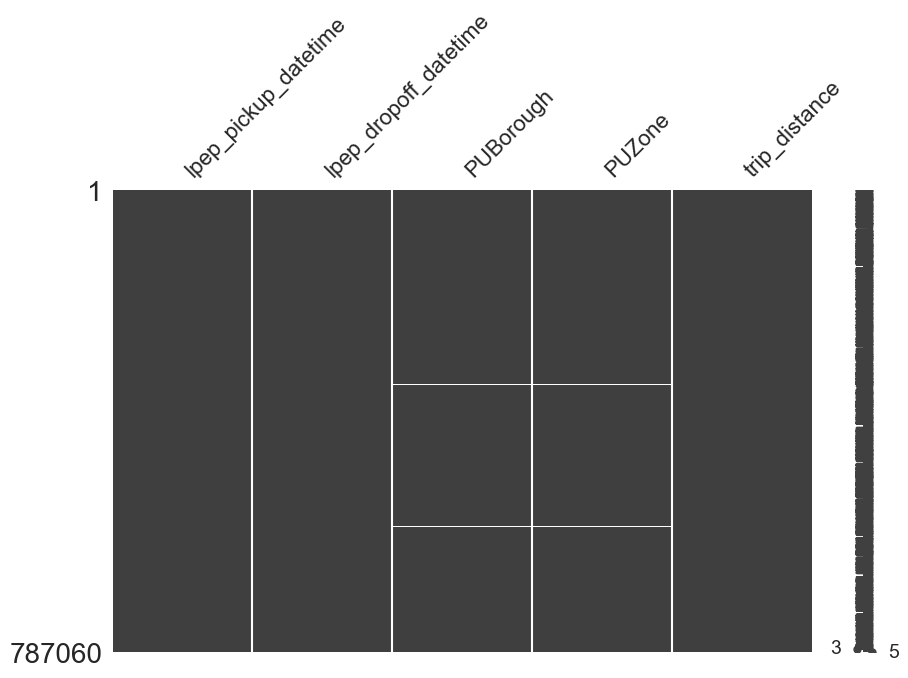

In [2181]:
msno.matrix(df, figsize=(10, 6))
plt.show()

Based on the informations above, we can see that the missing data is in `PUBorough` and `PUZone` and they are in various rows.

### **Checking Duplicate Value**

In [2182]:
df.duplicated().any()

True

In [2183]:
df[df.duplicated()].count()

lpep_pickup_datetime     2199
lpep_dropoff_datetime    2199
PUBorough                2171
PUZone                   2174
trip_distance            2199
dtype: int64

From the informations above, we can conclude that there are duplicate value in the dataset.

### **Handling Missing Data**

In [2184]:
display(len(df),
        df.isna().sum())

787060

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
PUBorough                2298
PUZone                   1562
trip_distance               0
dtype: int64

First we will check the data that's missing in the `PUBorough`, `DOBorough`, `PUZone` and `DOZone`

In [2185]:
display(df[df["PUBorough"].isna()].sample(3),
        df[df["PUZone"].isna()].sample(3))

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
446162,2023-07-23 16:24:44,2023-07-23 16:49:00,NaN,NaN,10.6
636832,2023-10-23 13:04:16,2023-10-23 13:29:53,NaN,NaN,0.0
171165,2023-03-17 20:24:10,2023-03-17 20:36:05,NaN,Outside of NYC,1.8


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
182869,2023-03-23 16:05:29,2023-03-23 16:49:12,NaN,NaN,0.0
469059,2023-08-02 12:10:21,2023-08-02 12:10:50,NaN,NaN,0.0
322201,2023-05-25 11:24:32,2023-05-25 11:24:34,NaN,NaN,0.0


Based on these missing data from `PUBorough`, and `PUZone` we can assume that the missing data is from outside of NYC Green Taxi Zone operational area, so i will be dropping the data.

In [2186]:
borough_zone = df[(df["PUBorough"].isna()) | (df["PUZone"].isna())]

In [2187]:
df.drop(borough_zone.index, inplace= True)

In [2188]:
display(len(df),
        df.isna().sum())

784762

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PUBorough                0
PUZone                   0
trip_distance            0
dtype: int64

In [2189]:
display(len(df),
        df.isna().sum())

784762

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PUBorough                0
PUZone                   0
trip_distance            0
dtype: int64

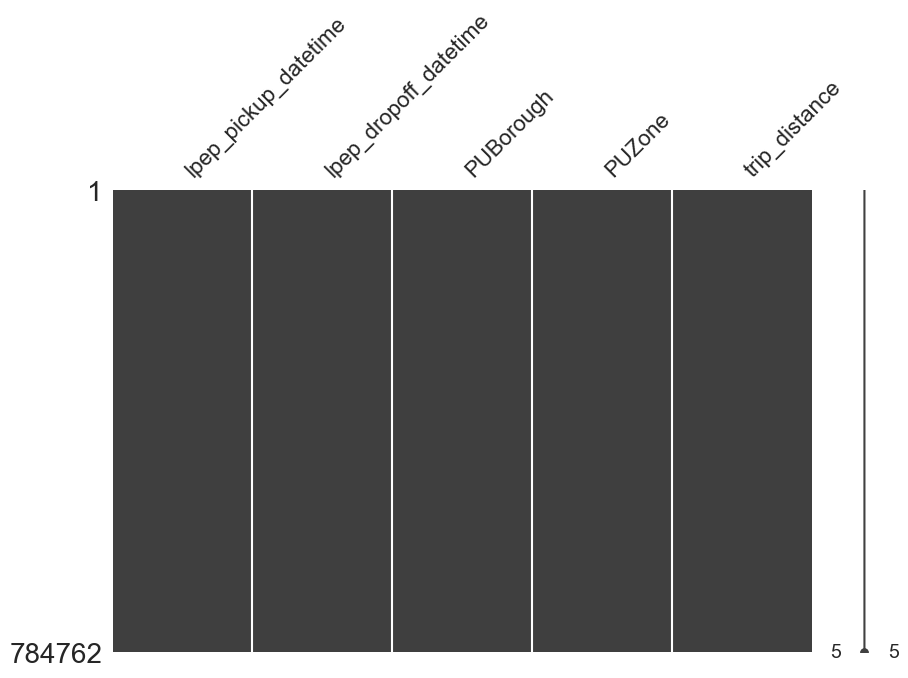

In [2190]:
msno.matrix(df, figsize=(10, 6))
plt.show()

### **Handling Duplicates Data**

In [2191]:
df[df.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
663,2023-01-01 14:58:13,2023-01-01 14:58:39,Manhattan,East Harlem South,0.17
899,2023-01-01 17:24:52,2023-01-01 17:25:12,Queens,Queensbridge/Ravenswood,0.00
1318,2023-01-02 02:05:08,2023-01-02 02:12:57,Queens,Jackson Heights,0.64
1687,2023-01-02 12:56:53,2023-01-02 13:00:10,Manhattan,East Harlem South,0.77
1865,2023-01-02 13:51:33,2023-01-02 13:52:42,Manhattan,East Harlem South,0.08
...,...,...,...,...,...
780797,2023-12-30 23:58:54,2023-12-30 23:58:59,Manhattan,Central Harlem,0.06
781328,2023-12-31 14:31:10,2023-12-31 14:31:23,Manhattan,Central Harlem,0.01
781766,2023-12-31 18:53:33,2023-12-31 18:54:26,Manhattan,East Harlem South,0.02
781941,2023-12-31 21:05:23,2023-12-31 21:06:40,Manhattan,Morningside Heights,0.00


There are duplicated value if it's based on all the columns, we need to check too if there are any duplicated data from specific columns, which is: 

`lpep_pickup_datetime` , `lpep_dropoff_datetime`, `passenger_count`, `trip_distance`

We can assume that from these columns if there are duplicated value than those data are the same.

In [2192]:
duplicated_df = df[df.duplicated(subset=["lpep_pickup_datetime", "lpep_dropoff_datetime", "trip_distance"], keep= "first")]
duplicated_df

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
173,2023-01-01 02:37:12,2023-01-01 02:37:15,Queens,Woodside,0.00
663,2023-01-01 14:58:13,2023-01-01 14:58:39,Manhattan,East Harlem South,0.17
899,2023-01-01 17:24:52,2023-01-01 17:25:12,Queens,Queensbridge/Ravenswood,0.00
1318,2023-01-02 02:05:08,2023-01-02 02:12:57,Queens,Jackson Heights,0.64
1687,2023-01-02 12:56:53,2023-01-02 13:00:10,Manhattan,East Harlem South,0.77
...,...,...,...,...,...
780797,2023-12-30 23:58:54,2023-12-30 23:58:59,Manhattan,Central Harlem,0.06
781328,2023-12-31 14:31:10,2023-12-31 14:31:23,Manhattan,Central Harlem,0.01
781766,2023-12-31 18:53:33,2023-12-31 18:54:26,Manhattan,East Harlem South,0.02
781941,2023-12-31 21:05:23,2023-12-31 21:06:40,Manhattan,Morningside Heights,0.00


In [2193]:
df.drop(duplicated_df.index, inplace= True)

In [2194]:
df[df.duplicated()].count()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
PUBorough                0
PUZone                   0
trip_distance            0
dtype: int64

By dropping duplicated data from the specific columns, we also eliminate the duplicated data from all columns.

### **Handling Outliers and Error Value**

#### **Datetime**

In [2195]:
outlier_year = df[df["lpep_pickup_datetime"].dt.year != 2023]
print(f"Total Date Data Outlier: {len(df[df["lpep_pickup_datetime"].dt.year != 2023])}")
outlier_year.head()

Total Date Data Outlier: 7


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
298,2022-12-09 14:10:49,2022-12-09 14:22:26,Queens,Astoria,5.37
318,2022-12-09 14:55:42,2022-12-09 15:33:06,Queens,Woodside,5.48
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,Brooklyn,Downtown Brooklyn/MetroTech,7.72
80120,2008-12-31 23:02:29,2009-01-01 16:41:01,Brooklyn,Downtown Brooklyn/MetroTech,3.03
275663,2008-12-31 22:41:41,2008-12-31 23:01:41,Manhattan,Morningside Heights,2.25


There are five data where the pickup date is outside 2023.

In [2196]:
df.drop(outlier_year.index, inplace= True)

In [2197]:
df[df["lpep_pickup_datetime"].dt.year != 2023]

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance


#### **Trip Distance**

<Axes: xlabel='trip_distance'>

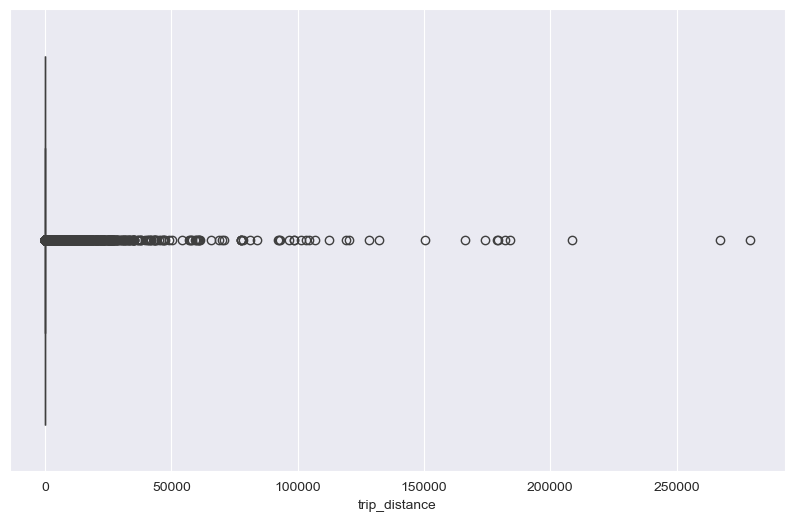

In [2198]:
plt.figure(figsize= (10, 6))
sns.boxplot(x= df["trip_distance"])

In [2199]:
df["trip_distance"].describe()

count    782582.000000
mean         19.087117
std        1042.652902
min           0.000000
25%           1.160000
50%           1.930000
75%           3.480000
max      278990.280000
Name: trip_distance, dtype: float64

- From the informations above, we can see that there is a zero value trip distance and a lot of outliers.

- According to this website, https://www.takewalks.com/blog/nyc-by-the-numbers#:~:text=The%20total%20area%20of%20the,southwest%2C%20is%20about%2035%20miles, **the longest distance between borough boundaries, from northeast to the southwest, is about 35 miles**.  

- We can assume that trips 0.25 mile and 35 miles are an error by the gps system, so I will impute them with median distance of each pickup and dropoff boroughs

In [2200]:
outlier_distance = df[(df["trip_distance"] < 0.25) | (df["trip_distance"] > 35)]
print(f"Amount of data for zero and extreme outlier trip distance: {len(outlier_distance)}")
print(f"Percentage of data for zero and extreme outlier trip distance: {round(len(outlier_distance)/len(df)*100,2)}%")
outlier_distance.sample(5, random_state= 42)

Amount of data for zero and extreme outlier trip distance: 48299
Percentage of data for zero and extreme outlier trip distance: 6.17%


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
275463,2023-05-03 12:31:22,2023-05-03 13:02:09,Bronx,Spuyten Duyvil/Kingsbridge,0.0
129764,2023-02-09 11:43:00,2023-02-09 12:24:00,Queens,Steinway,0.0
638356,2023-10-24 09:09:10,2023-10-24 09:31:10,Brooklyn,Bensonhurst West,0.0
130348,2023-02-12 18:29:00,2023-02-12 18:49:00,Bronx,West Concourse,0.0
515298,2023-08-28 01:05:04,2023-08-28 01:12:05,Manhattan,East Harlem North,0.0


In [2201]:
borough_median_distance = df[(df["trip_distance"] > 0.25) & (df["trip_distance"] < 35)].groupby("PUBorough").agg(median= ("trip_distance", "median")).reset_index()
borough_median_distance

,PUBorough,median
0,Bronx,3.15
1,Brooklyn,2.78
2,Manhattan,1.86
3,Queens,2.39
4,Staten Island,3.78


In [2202]:
borough_distance = pd.merge(outlier_distance, borough_median_distance, on= ["PUBorough"], how= "left")
borough_distance.index = outlier_distance.index
display(borough_distance.sample(5, random_state= 42))

df.loc[outlier_distance.index, 'trip_distance'] = borough_distance['median']
df.loc[outlier_distance.index].sample(5, random_state= 42)

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,median
275463,2023-05-03 12:31:22,2023-05-03 13:02:09,Bronx,Spuyten Duyvil/Kingsbridge,0.0,3.15
129764,2023-02-09 11:43:00,2023-02-09 12:24:00,Queens,Steinway,0.0,2.39
638356,2023-10-24 09:09:10,2023-10-24 09:31:10,Brooklyn,Bensonhurst West,0.0,2.78
130348,2023-02-12 18:29:00,2023-02-12 18:49:00,Bronx,West Concourse,0.0,3.15
515298,2023-08-28 01:05:04,2023-08-28 01:12:05,Manhattan,East Harlem North,0.0,1.86


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance
275463,2023-05-03 12:31:22,2023-05-03 13:02:09,Bronx,Spuyten Duyvil/Kingsbridge,3.15
129764,2023-02-09 11:43:00,2023-02-09 12:24:00,Queens,Steinway,2.39
638356,2023-10-24 09:09:10,2023-10-24 09:31:10,Brooklyn,Bensonhurst West,2.78
130348,2023-02-12 18:29:00,2023-02-12 18:49:00,Bronx,West Concourse,3.15
515298,2023-08-28 01:05:04,2023-08-28 01:12:05,Manhattan,East Harlem North,1.86


In [2203]:
df["trip_distance"].describe()

count    782582.000000
mean          3.058613
std           3.060736
min           0.250000
25%           1.320000
50%           2.110000
75%           3.470000
max          34.960000
Name: trip_distance, dtype: float64

#### **Data Handling: Trip Duration**

I am going to make a new column for `trip_duration` for futher data handling

In [2204]:
df["trip_duration"] = round((df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds()/60, 2)

<Axes: xlabel='trip_duration'>

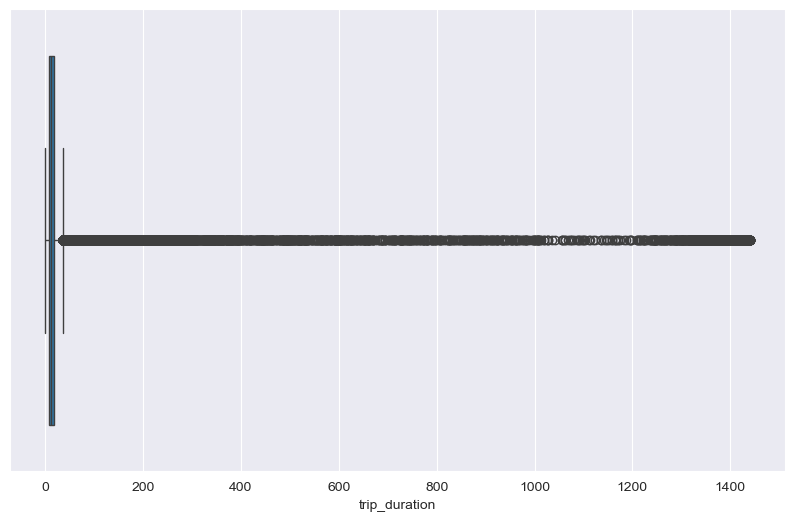

In [2205]:
plt.figure(figsize= (10, 6))
sns.boxplot(x= df["trip_duration"])

In [2206]:
df["trip_duration"].describe()

count    782582.000000
mean         19.641791
std          77.401583
min           0.000000
25%           7.580000
50%          12.000000
75%          18.820000
max        1439.920000
Name: trip_duration, dtype: float64

From the informations above, we can see that there is a zero value trip duration and a lot of outliers. <br>

First, considering congestions and stop lights, a taxi trip below 2 minutes is an invalid data, considering that it is a human error, I will be dropping these data.

In [2207]:
under_duration = df[df["trip_duration"] < 2]
print(f"Amount of data for below 2 minutes trip duration: {len(under_duration)}")
print(f"Percentage of data for below 2 minutes trip duration: {round(len(under_duration)/len(df)*100,2)}%")
under_duration

Amount of data for below 2 minutes trip duration: 25501
Percentage of data for below 2 minutes trip duration: 3.26%


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,trip_duration
35,2023-01-01 00:41:53,2023-01-01 00:41:58,Queens,Elmhurst/Maspeth,6.70,0.08
99,2023-01-01 01:27:36,2023-01-01 01:27:43,Bronx,Mott Haven/Port Morris,3.15,0.12
104,2023-01-01 01:11:01,2023-01-01 01:11:06,Queens,Old Astoria,2.39,0.08
107,2023-01-01 01:11:13,2023-01-01 01:11:36,Queens,Astoria,2.39,0.38
146,2023-01-01 02:03:52,2023-01-01 02:03:57,Bronx,Mount Hope,3.15,0.08
...,...,...,...,...,...,...
786330,2023-12-22 14:56:00,2023-12-22 14:57:00,Manhattan,East Harlem South,1.86,1.00
786582,2023-12-26 08:40:00,2023-12-26 08:41:00,Queens,Laurelton,2.39,1.00
786785,2023-12-28 10:08:00,2023-12-28 10:08:00,Brooklyn,East Flatbush/Remsen Village,2.78,0.00
786843,2023-12-29 04:07:00,2023-12-29 04:08:00,Queens,JFK Airport,2.39,1.00


From the information above, I am going to conlude that this data is a canceled trip because of `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PUBorough`, `PUZone`, `DOBorough`, `DOZone` are the same, therefore I am going to drop the zero value duration trip.

In [2208]:
df.drop(under_duration.index, inplace= True)

Next, based on the longest distance above, about 35 miles, and by considering there are congestions or peak hours, the taxi can only achieve about 15 mph, then **trip duration more than 140 minutes are considered extreme outliers**

In [2209]:
outlier_duration = df[df["trip_duration"] > 140]
print(f"Amount of data for extreme outlier trip duration: {len(outlier_duration)}")
print(f"Percentage of data for extreme outlier trip duration: {round(len(outlier_duration)/len(df)*100,2)}%")
outlier_duration

Amount of data for extreme outlier trip duration: 3633
Percentage of data for extreme outlier trip duration: 0.48%


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,trip_duration
49,2023-01-01 00:23:04,2023-01-01 23:18:32,Brooklyn,Williamsburg (North Side),8.55,1375.47
108,2023-01-01 01:53:59,2023-01-02 00:00:00,Queens,Woodside,2.64,1326.02
118,2023-01-01 01:25:46,2023-01-02 00:29:15,Queens,Jackson Heights,6.53,1383.48
207,2023-01-01 03:12:42,2023-01-02 02:03:43,Queens,Jackson Heights,0.72,1371.02
262,2023-01-01 04:03:36,2023-01-02 03:31:50,Brooklyn,Downtown Brooklyn/MetroTech,3.61,1408.23
...,...,...,...,...,...,...
781673,2023-12-31 15:29:58,2024-01-01 14:56:28,Brooklyn,Fort Greene,2.67,1406.50
781813,2023-12-31 19:52:51,2024-01-01 00:00:00,Brooklyn,DUMBO/Vinegar Hill,2.78,247.15
781953,2023-12-31 15:20:25,2024-01-01 14:34:34,Brooklyn,Downtown Brooklyn/MetroTech,1.90,1394.15
782509,2023-12-03 14:45:00,2023-12-03 18:43:00,Brooklyn,East New York,2.78,238.00


Considering that `lpep_pickup_datetime` and `lpep_dropoff_datetime` are when the meter are engaged, I am going to assume that it is a human error data therefore it is unreliable or inaccurate, so I am going to drop this data too.

In [2210]:
df.drop(outlier_duration.index, inplace= True)

In [2211]:
df["trip_duration"].describe()

count    753448.000000
mean         15.449121
std          11.816150
min           2.000000
25%           8.000000
50%          12.270000
75%          19.000000
max         139.900000
Name: trip_duration, dtype: float64

#### **Data Handling: Trip Speed**

Same as `trip_duration`, I will be making new column for `trip_speed` for data handling 

In [2212]:
df["trip_speed"] = round(df["trip_distance"] / (df["trip_duration"] / 60), 2)

<Axes: xlabel='trip_speed'>

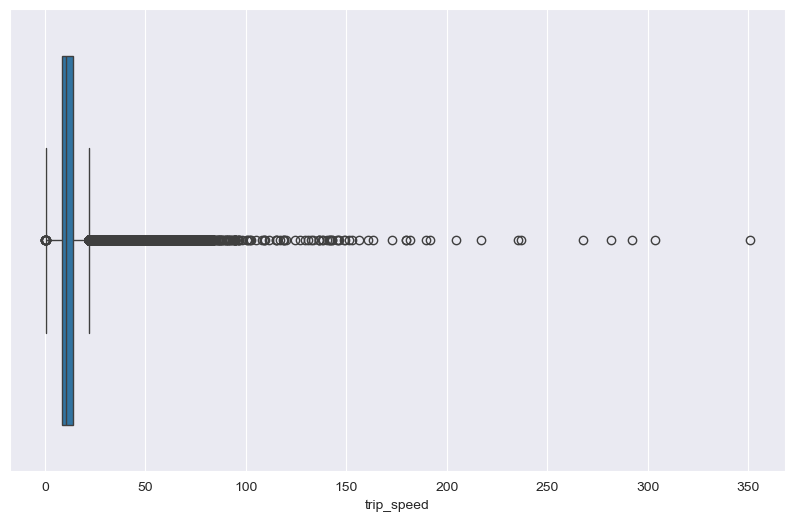

In [2213]:
plt.figure(figsize= (10, 6))
sns.boxplot(x=df["trip_speed"])

In [2214]:
df["trip_speed"].describe()

count    753448.000000
mean         11.943825
std           6.192669
min           0.120000
25%           8.360000
50%          10.510000
75%          13.710000
max         350.710000
Name: trip_speed, dtype: float64

- From the informations above, we can see that there are anomalies in the `trip_speed` data.

- NYC TLC regulation, https://www.nyc.gov/assets/tlc/downloads/pdf/driver_education_study_guide.pdf, the speed limit in NYC is 25 mph, unless otherwise posted, and the speed limit in highways is 55 mph or unless otherwise posted.

- Assumption, there is a heavy congestion and/or peak hours, taxi speed can only go up to 5 mph.

In [2215]:
outlier_speed = df[(df["trip_speed"] < 5) | (df["trip_speed"] > 55)]
print(f"Amount of data under 5 mph and above 55 mph: {len(outlier_speed)}")
print(f"Percentage of data under 5 mph and above 55 mph: {round(len(outlier_speed)/len(df)*100,2)}%")
outlier_speed

Amount of data under 5 mph and above 55 mph: 26758
Percentage of data under 5 mph and above 55 mph: 3.55%


,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,trip_duration,trip_speed
171,2023-01-01 02:47:27,2023-01-01 02:53:31,Bronx,Mott Haven/Port Morris,0.47,6.07,4.65
209,2023-01-01 03:35:44,2023-01-01 04:30:10,Queens,Elmhurst,2.39,54.43,2.63
219,2023-01-01 03:26:34,2023-01-01 03:28:49,Queens,Jackson Heights,2.39,2.25,63.73
425,2023-01-01 11:37:30,2023-01-01 12:24:00,Brooklyn,Brighton Beach,2.78,46.50,3.59
545,2023-01-01 12:53:04,2023-01-01 14:10:09,Manhattan,Central Harlem,4.26,77.08,3.32
...,...,...,...,...,...,...,...
786907,2023-12-29 14:33:00,2023-12-29 15:20:00,Queens,Elmhurst,2.39,47.00,3.05
786911,2023-12-29 15:49:00,2023-12-29 16:04:00,Manhattan,Central Harlem North,21.99,15.00,87.96
786927,2023-12-29 20:00:00,2023-12-29 20:54:00,Manhattan,Central Harlem,1.86,54.00,2.07
786960,2023-12-30 13:39:37,2023-12-30 14:07:40,Manhattan,Washington Heights North,1.86,28.05,3.98


Because it is a combination of human error and a gps system error, also the low percentage of data, I will be dropping the below 5 mph and above 55 mph.

In [2216]:
df.drop(outlier_speed.index, inplace= True)

In [2217]:
display(df.describe().T,
        df.describe(include= object).T)

,count,mean,min,25%,50%,75%,max,std
lpep_pickup_datetime,726690,2023-06-28 14:31:58.624642048,2023-01-01 00:01:31,2023-03-27 18:27:54.750000128,2023-06-24 02:39:35,2023-09-28 21:52:16.249999872,2023-12-31 23:57:58,NaN
lpep_dropoff_datetime,726690,2023-06-28 14:46:56.467621632,2023-01-01 00:13:26,2023-03-27 18:39:59.249999872,2023-06-24 02:55:49,2023-09-28 22:05:39.249999872,2024-01-01 00:11:05,NaN
trip_distance,726690.0,3.122781,0.25,1.33,2.11,3.62,34.93,3.090443
trip_duration,726690.0,14.964048,2.0,7.93,12.1,18.53,139.9,10.966794
trip_speed,726690.0,12.154914,5.0,8.58,10.66,13.87,54.98,5.620588


,count,unique,top,freq
PUBorough,726690,5,Manhattan,425253
PUZone,726690,237,East Harlem North,153118


### **Feature Engineering**

- Creating `trip_month`, `trip_day`, `trip_hour`, `trip_distance_type`, and `trip_season` columns for analysis.

In [2218]:
df["trip_month"] = df["lpep_pickup_datetime"].dt.month_name()
df["trip_day"] = df["lpep_pickup_datetime"].dt.day_name()
df["trip_hour_of_day"] = df["lpep_pickup_datetime"].dt.hour

df.sample(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,trip_duration,trip_speed,trip_month,trip_day,trip_hour_of_day
603029,2023-10-06 08:32:41,2023-10-06 08:38:32,Manhattan,Central Harlem North,1.06,5.85,10.87,October,Friday,8
440854,2023-07-20 16:31:10,2023-07-20 16:53:51,Manhattan,East Harlem North,2.26,22.68,5.98,July,Thursday,16
461081,2023-07-31 16:42:21,2023-07-31 16:51:16,Queens,Jamaica,1.52,8.92,10.22,July,Monday,16


In [2219]:
bins_season = [1, 3, 6, 9, 12, 13]  # Including 13 to cover December
labels_season = ["Winter", "Spring", "Summer", "Autumn", "Winter"]

df["trip_season"] = pd.cut(df["lpep_pickup_datetime"].dt.month, bins= bins_season, labels= labels_season, right= False, ordered= False)

In [2220]:
df.sample()

,lpep_pickup_datetime,lpep_dropoff_datetime,PUBorough,PUZone,trip_distance,trip_duration,trip_speed,trip_month,trip_day,trip_hour_of_day,trip_season
131879,2023-02-22 07:32:00,2023-02-22 08:19:00,Manhattan,Washington Heights South,22.66,47.0,28.93,February,Wednesday,7,Winter


- Rearranging column index

In [2221]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PUBorough', 'PUZone',
       'trip_distance', 'trip_duration', 'trip_speed', 'trip_month',
       'trip_day', 'trip_hour_of_day', 'trip_season'],
      dtype='object')

In [2222]:
df = df[["lpep_pickup_datetime", 
         "lpep_dropoff_datetime",
         "trip_season", 
         "trip_month", 
         "trip_day", 
         "trip_hour_of_day", 
         "PUBorough", 
         "PUZone", 
         "trip_distance", 
         "trip_duration", 
         "trip_speed", ]]

In [2223]:
df.sample(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_season,trip_month,trip_day,trip_hour_of_day,PUBorough,PUZone,trip_distance,trip_duration,trip_speed
725242,2023-12-02 01:36:07,2023-12-02 01:44:05,Winter,December,Saturday,1,Queens,Woodside,1.24,7.97,9.34
83098,2023-02-07 22:22:45,2023-02-07 22:32:59,Winter,February,Tuesday,22,Queens,Elmhurst,2.18,10.23,12.79
321930,2023-05-25 08:45:53,2023-05-25 09:02:11,Spring,May,Thursday,8,Queens,Sunnyside,6.60,16.30,24.29


In [2224]:
df.to_csv("NYC TLC Time and Location Trips in 2023.csv", index= False)

> # **Data Analysis**
---

## **1. Identify Peak Passenger Demand by Location**

- ### **Passenger Demand by Borough**

In [2225]:
demand_borough = df.groupby("PUBorough").agg(demand_by_borough= ("PUBorough", "count")).sort_values(by= "demand_by_borough", ascending= False).reset_index()
demand_borough

,PUBorough,demand_by_borough
0,Manhattan,425253
1,Queens,187686
2,Brooklyn,99891
3,Bronx,13794
4,Staten Island,66


In [2260]:
demand_borough.to_csv("demand borough.csv", index= False)

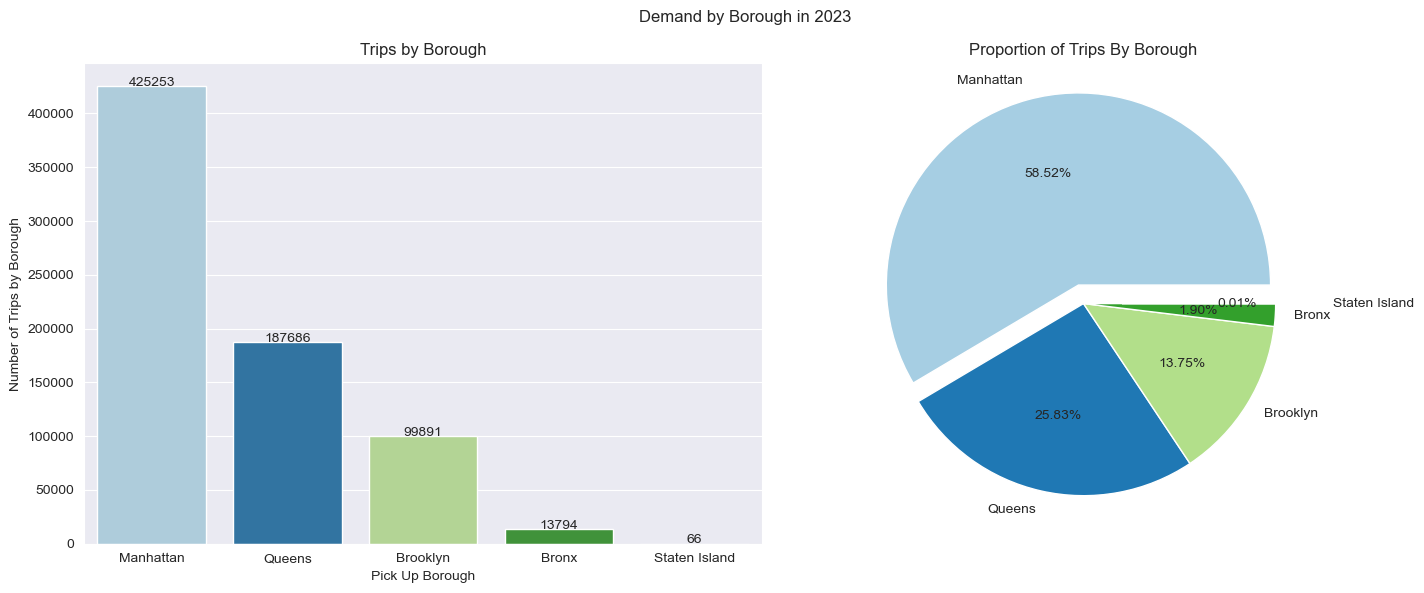

In [2226]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Borough in 2023")

plt.subplot(1,2,1)
bars = sns.barplot(x=demand_borough['PUBorough'], 
                   y=demand_borough['demand_by_borough'], 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(demand_borough['demand_by_borough'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trips by Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Number of Trips by Borough')

plt.subplot(1,2,2)
plt.pie(demand_borough["demand_by_borough"],
        labels= demand_borough["PUBorough"],
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0.2),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Trips By Borough")

plt.tight_layout()
plt.show()

**Insights**
- Borough with the peak demand of green taxi is Manhattan with 425,253 trips or 58.52% of total trips
- Borough with the lowest demand of green taxi is Staten Island with 66 trips or 0.01% of total trips

- ### **Passenger Demand by Zone**

In [2261]:
demand_zone = df.groupby(["PUBorough", "PUZone"]).agg(demand_by_zone= ("PUZone", "count")).sort_values(by= "demand_by_zone", ascending= False).reset_index()
top_10_zone = demand_zone.head(10)

In [2262]:
top_10_zone.to_csv("top 10 zone.csv", index= False)

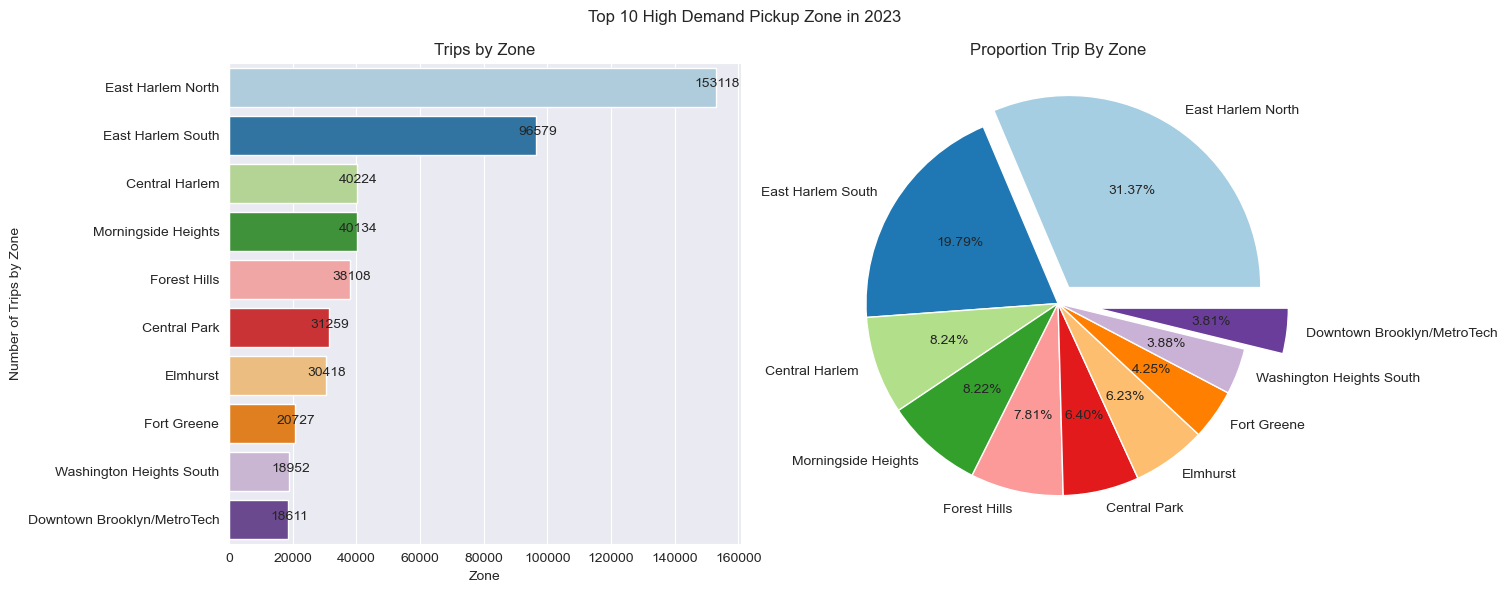

In [2228]:
plt.figure(figsize=(15,6))

plt.suptitle("Top 10 High Demand Pickup Zone in 2023")

plt.subplot(1,2,1)
bars = sns.barplot(data=demand_zone.head(10),
                   y='PUZone', 
                   x='demand_by_zone', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(demand_zone['demand_by_zone'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Zone")
plt.xlabel("Zone")
plt.ylabel("Number of Trips by Zone")

plt.subplot(1,2,2)
plt.pie(demand_zone["demand_by_zone"].head(10),
        labels= demand_zone["PUZone"].head(10),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0,0,0,0,0,0.2),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Zone")

plt.tight_layout()
plt.show()

**Insights**
- From the top 10 pickup zone by amount of trips, the peak demand for green taxi by zone is East Harlem North with 153,118 trips or 31.37% of all trips
- the lowest demand for green taxi by top 10 zone is Central Harlem North with 18,611 trips or 3.81% of all trips.

In [2263]:
manhattan_zone = df[df["PUBorough"] == "Manhattan"].groupby(["PUBorough", "PUZone"], as_index= False).agg(trip_manhattan= ("PUZone", "count")).sort_values(by= "trip_manhattan", ascending= False).head()
queens_zone = df[df["PUBorough"] == "Queens"].groupby(["PUBorough", "PUZone"], as_index= False).agg(trip_queens= ("PUZone", "count")).sort_values(by= "trip_queens", ascending= False).head()
brooklyn_zone = df[df["PUBorough"] == "Brooklyn"].groupby(["PUBorough", "PUZone"], as_index= False).agg(trip_brooklyn= ("PUZone", "count")).sort_values(by= "trip_brooklyn", ascending= False).head()
bronx_zone = df[df["PUBorough"] == "Bronx"].groupby(["PUBorough", "PUZone"], as_index= False).agg(trip_bronx= ("PUZone", "count")).sort_values(by= "trip_bronx", ascending= False).head()
staten_zone = df[df["PUBorough"] == "Staten Island"].groupby(["PUBorough", "PUZone"], as_index= False).agg(trip_staten= ("PUZone", "count")).sort_values(by= "trip_staten", ascending= False).head()


In [2264]:
manhattan_zone.to_csv("manhattan_zone.csv", index= False)
queens_zone.to_csv("queens_zone.csv", index= False)
brooklyn_zone.to_csv("brooklyn_zone.csv", index= False)
bronx_zone.to_csv("bronx_zone.csv", index= False)
staten_zone.to_csv("staten_zone.csv", index= False)

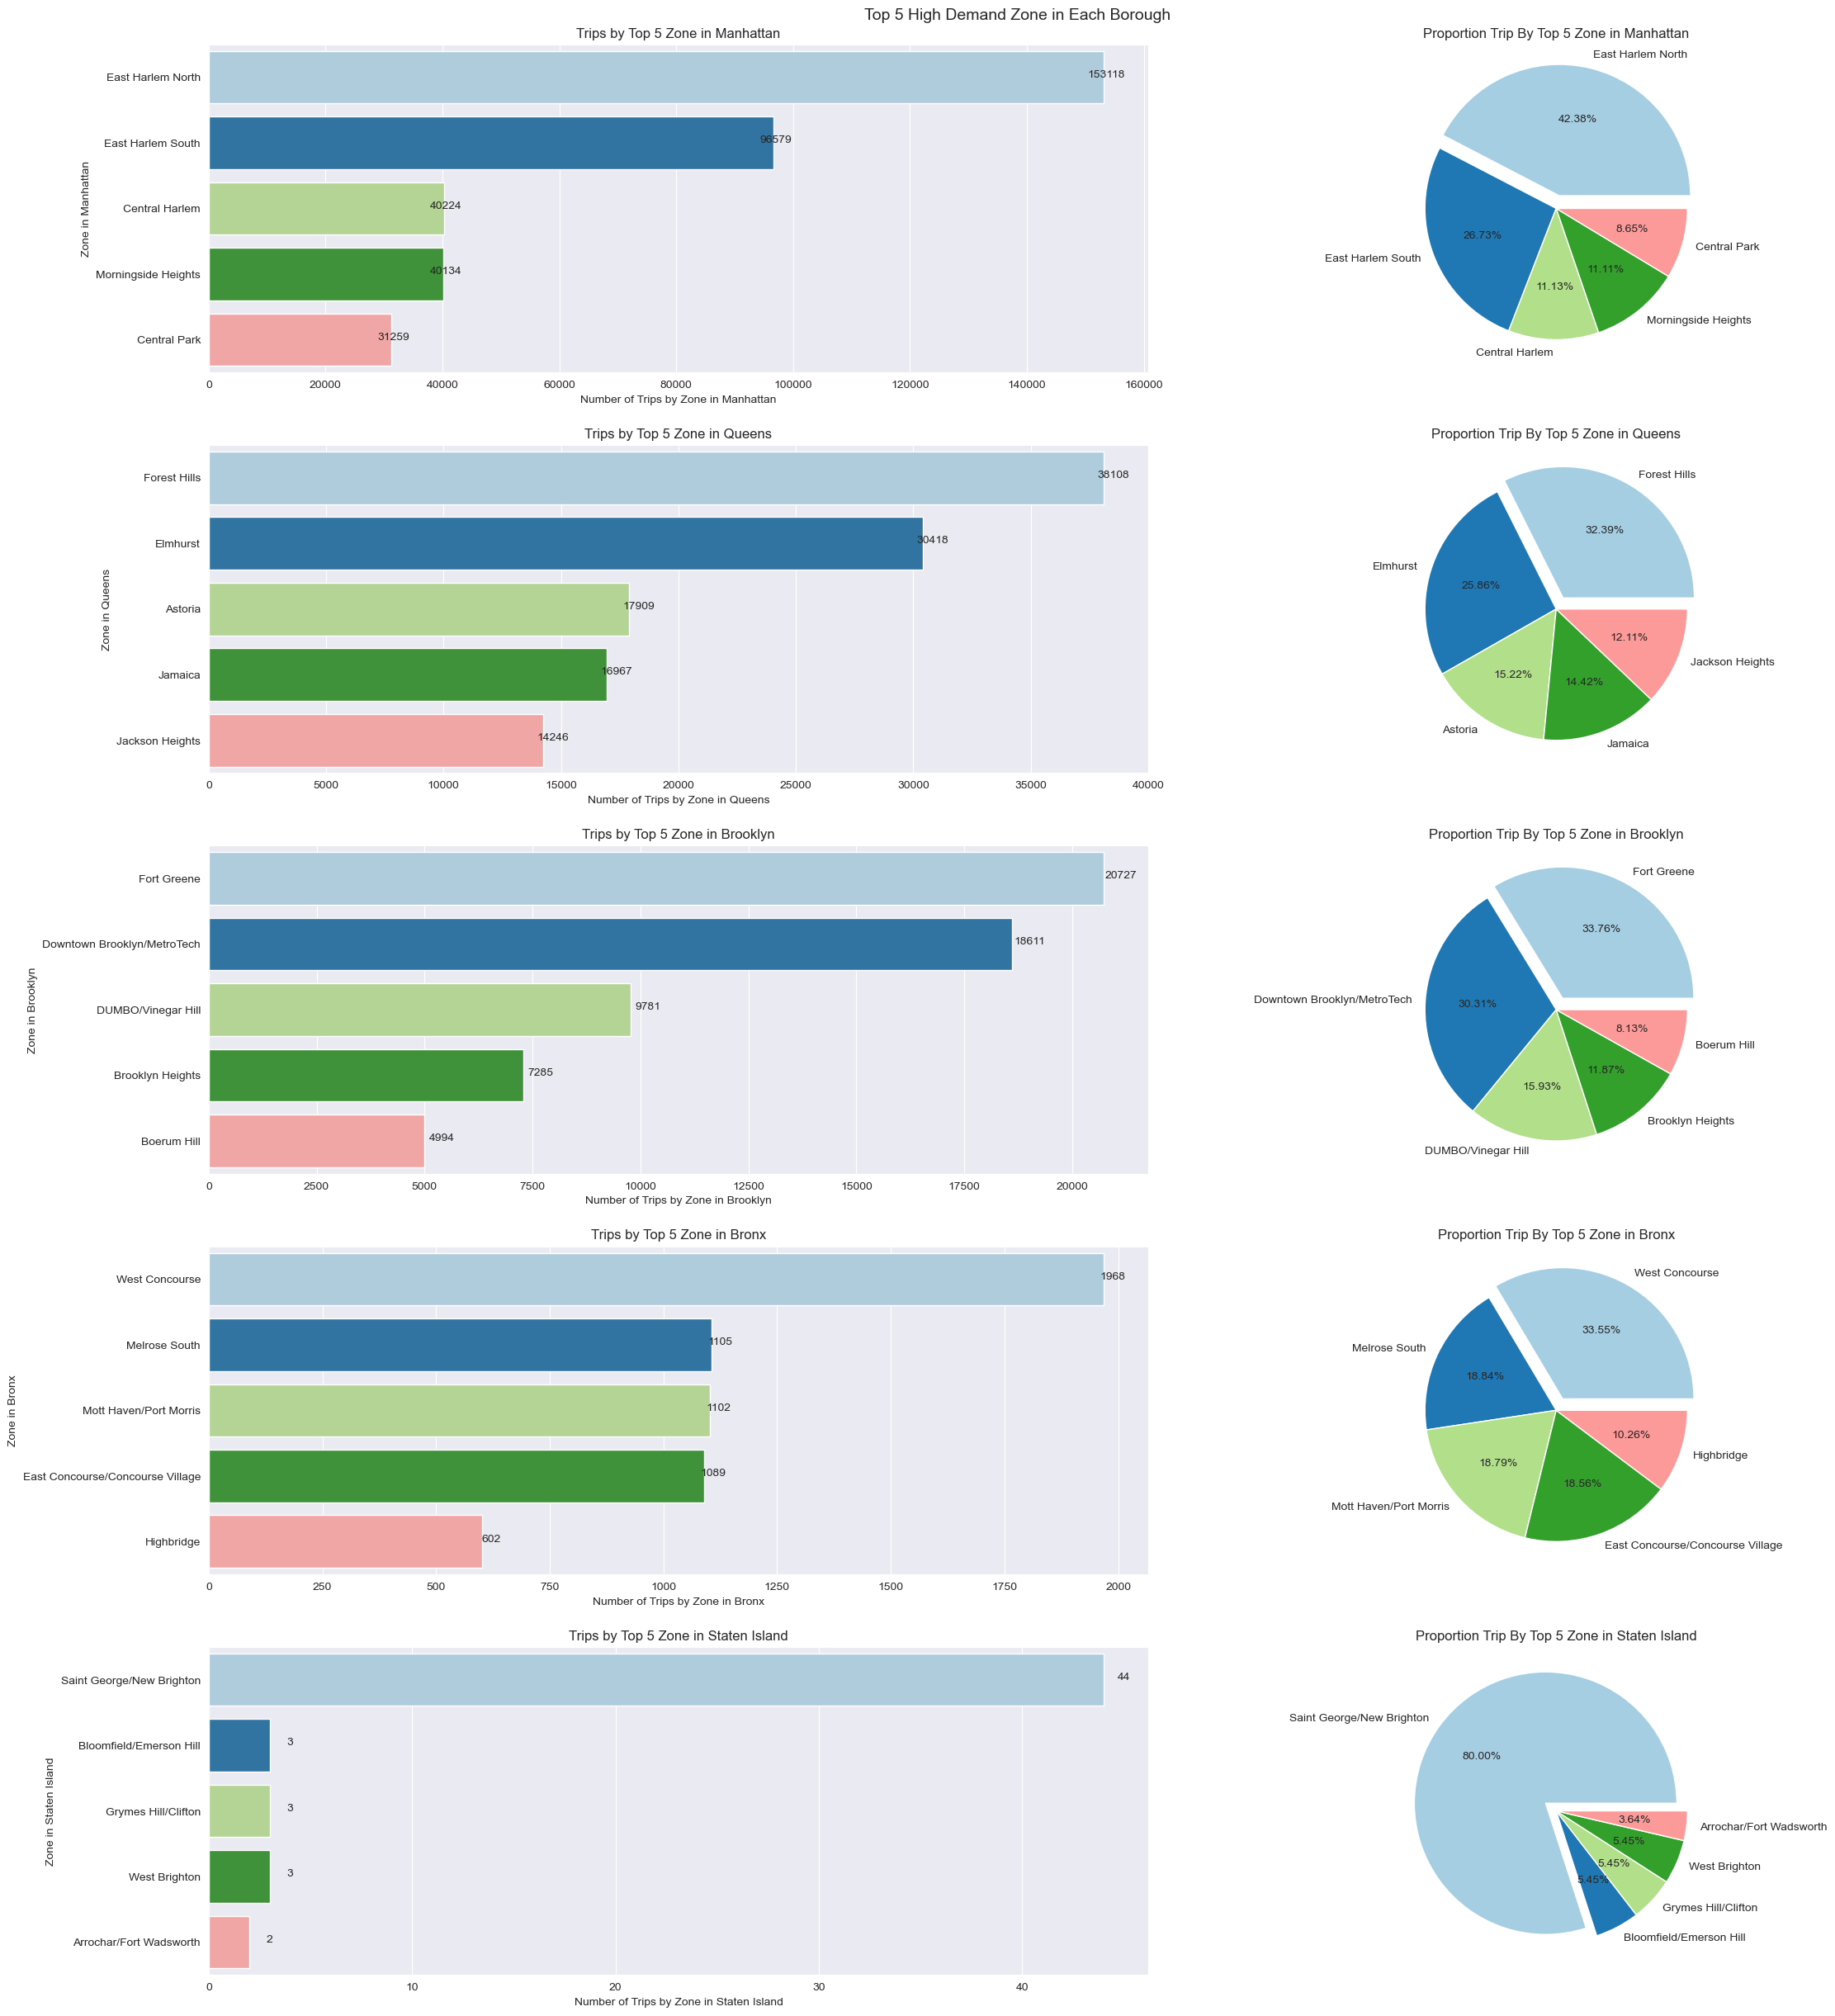

In [2230]:
plt.figure(figsize=(25, 25))

plt.suptitle("Top 5 High Demand Zone in Each Borough", fontsize= 14)

plt.subplot(5,2,1)
bars = sns.barplot(data=manhattan_zone.head(),
                   y='PUZone', 
                   x='trip_manhattan', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(manhattan_zone['trip_manhattan'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Top 5 Zone in Manhattan")
plt.ylabel("Zone in Manhattan")
plt.xlabel("Number of Trips by Zone in Manhattan")

plt.subplot(5,2,2)
plt.pie(manhattan_zone["trip_manhattan"].head(),
        labels= manhattan_zone["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Manhattan")

plt.subplot(5,2,3)
bars = sns.barplot(data=queens_zone.head(),
                   y='PUZone', 
                   x='trip_queens', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(queens_zone['trip_queens'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Top 5 Zone in Queens")
plt.ylabel("Zone in Queens")
plt.xlabel("Number of Trips by Zone in Queens")

plt.subplot(5,2,4)
plt.pie(queens_zone["trip_queens"].head(),
        labels= queens_zone["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Queens")

plt.subplot(5,2,5)
bars = sns.barplot(data=brooklyn_zone.head(),
                   y='PUZone', 
                   x='trip_brooklyn', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(brooklyn_zone['trip_brooklyn'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Top 5 Zone in Brooklyn")
plt.ylabel("Zone in Brooklyn")
plt.xlabel("Number of Trips by Zone in Brooklyn")

plt.subplot(5,2,6)
plt.pie(brooklyn_zone["trip_brooklyn"].head(),
        labels= brooklyn_zone["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Brooklyn")

plt.subplot(5,2,7)
bars = sns.barplot(data=bronx_zone.head(),
                   y='PUZone', 
                   x='trip_bronx', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 20
    label = "{:.0f}".format(bronx_zone['trip_bronx'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Top 5 Zone in Bronx")
plt.ylabel("Zone in Bronx")
plt.xlabel("Number of Trips by Zone in Bronx")

plt.subplot(5,2,8)
plt.pie(bronx_zone["trip_bronx"].head(),
        labels= bronx_zone["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Bronx")

plt.subplot(5,2,9)
bars = sns.barplot(data=staten_zone.head(),
                   y='PUZone', 
                   x='trip_staten', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 1
    label = "{:.0f}".format(staten_zone['trip_staten'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Trips by Top 5 Zone in Staten Island")
plt.ylabel("Zone in Staten Island")
plt.xlabel("Number of Trips by Zone in Staten Island")

plt.subplot(5,2,10)
plt.pie(staten_zone["trip_staten"].head(),
        labels= staten_zone["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Staten Island")

plt.tight_layout(pad= 2)
plt.show()

**Insights**
- Manhattan:
    - Peak demand in top 5 zone in Manhattan is at East Harlem North with 153,118 trips or 42.38% of all trips in the top 5 zone in Manhattan
    - Lowest demand in top 5 zone in Manhattan is at Central Park with 31,259 trips or 8.65% of all trips in the top 5 zone in Manhattan

- Queens:
    - Peak demand in top 5 zone in Queens is at Forest Hills with 38,108 trips or 32.39% of all trips in the top 5 zone in Queens
    - Lowest demand in top 5 zone in Queens is at Jackson Heights with 14,246 trips or 12.11% of all trips in the top 5 zone in Queens

- Brooklyn:
    - Peak demand in top 5 zone in Brooklyn is at Fort Greene with 20,727 trips or 33.76% of all trips in the top 5 zone in Brooklyn
    - Lowest demand in top 5 zone in Brooklyn is at Boerum Hill with 4,994 trips or 8.13% of all trips in the top 5 zone in Brooklyn

- Bronx:
    - Peak demand in top 5 zone in Bronx is at West Concourse with 1,968 trips or 33.55% of all trips in the top 5 zone in Bronx
    - Lowest demand in top 5 zone in Bronx is at Highbridge with 602 trips or 10.26% of all trips in the top 5 zone in Bronx

- Staten Island:
    - Peak demand in top 5 zone in Staten Island is at Saint George/New Brighton with 44 trips or 80.00% of all trips in the top 5 zone in Staten Island
    - Lowest demand in top 5 zone in Staten Island is at Arrochar with 2 trips or 5.45% of all trips in the top 5 zone in Staten Island

## **2. Identify Peak Passenger Demand by Time**

- ### **Passenger Demand by Months**

In [2231]:
demand_months = df.groupby("trip_month", sort= False).agg(demand_by_month = ("trip_month", "count")).reset_index()
demand_months

,trip_month,demand_by_month
0,January,63679
1,February,60429
2,March,66794
3,April,60792
4,May,64042
5,June,60560
6,July,56735
7,August,55810
8,September,59634
9,October,60629


In [2265]:
demand_months.to_csv("demand_months.csv", index= False)

Text(0, 0.5, 'Number of Trips by Month')

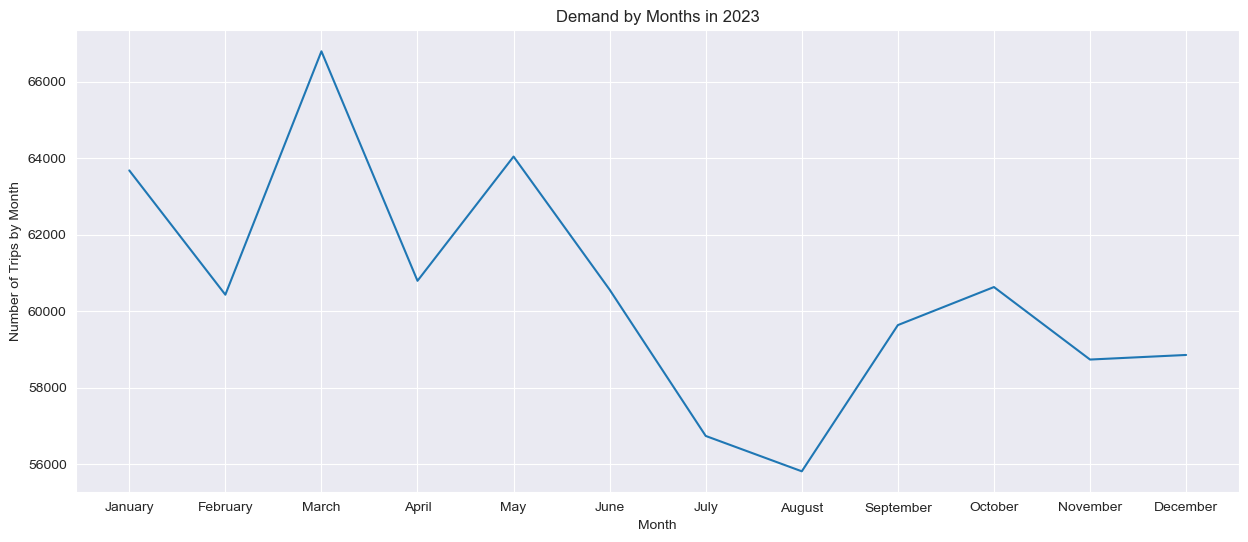

In [2232]:
plt.figure(figsize=(15,6))
sns.lineplot(data= demand_months, x= "trip_month", y= "demand_by_month")
plt.title("Demand by Months in 2023")
plt.xlabel("Month")
plt.ylabel("Number of Trips by Month")

**Insights**
- Demand for Green Taxi fluctuated throughout the year 2023. 
- peak demand for Green Taxi is in March
- Lowest demand for Green Taxi is in August

- ### **Passenger Demand by Days**

In [2233]:
demand_days = df.groupby("trip_day", sort= False, as_index= False).agg(demand_by_day = ("trip_day", "count"))
demand_days

,trip_day,demand_by_day
0,Sunday,85001
1,Monday,100932
2,Tuesday,106455
3,Wednesday,112936
4,Thursday,114992
5,Friday,112370
6,Saturday,94004


In [2266]:
demand_days.to_csv("demand_days.csv", index= False)

Text(0, 0.5, 'Number of Trips by Month')

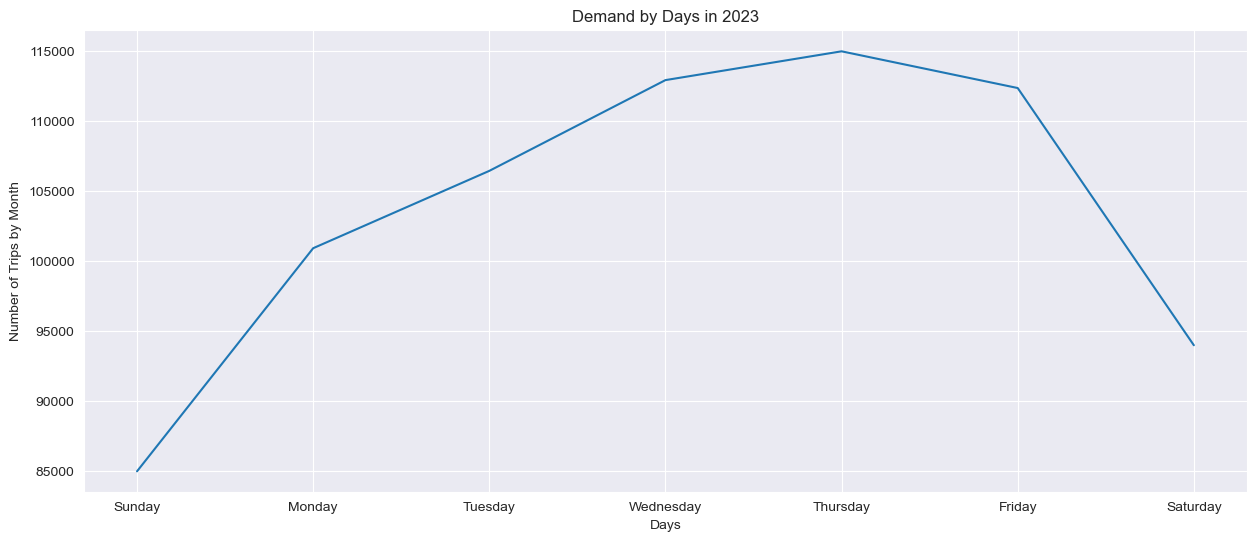

In [2234]:
plt.figure(figsize=(15,6))
sns.lineplot(data= demand_days, x= "trip_day", y= "demand_by_day")
plt.title("Demand by Days in 2023")
plt.xlabel("Days")
plt.ylabel("Number of Trips by Month")

**Insights**
- Increase in demands from weekend (Sunday) to weekdays (Monday - Thursday) then decrease as the week enter weekend (Thursday - Saturday)
- peak demand is in Thursday
- Lowest demand is in Sunday.

- ### **Passenger Demand by Hour of Days**

In [2235]:
demand_time_day = df[["trip_day", "trip_hour_of_day"]].groupby(["trip_day", "trip_hour_of_day"], sort= False, as_index= False).agg(demand_hour_day = ('trip_hour_of_day', "count"))
demand_time_day

,trip_day,trip_hour_of_day,demand_hour_day
0,Sunday,0,3179
1,Sunday,1,2488
2,Sunday,2,1901
3,Sunday,3,1627
4,Sunday,4,1117
...,...,...,...
163,Saturday,19,5720
164,Saturday,20,5020
165,Saturday,21,4497
166,Saturday,22,4118


In [2267]:
demand_time_day.to_csv("demand_time_day.csv", index= False)

In [2236]:
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
cross_time_day = pd.crosstab(index= df["trip_day"], columns= df["trip_hour_of_day"]).reindex(day_order)
cross_time_day

trip_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
trip_day,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,3179,2488,1901,1627,1117,727,906,1349,1857,2757,3733,4575,5269,5231,5680,6001,5900,5893,6073,5199,4488,3926,2910,2215
Monday,1328,889,557,510,493,627,1844,4584,5509,5821,5739,5580,5757,5636,6501,7083,7651,7883,8030,6161,4538,3652,2704,1855
Tuesday,1253,747,476,310,318,557,1938,4983,6110,6346,6231,5813,6028,5783,6595,7178,7992,8328,8375,6580,4988,4222,3175,2129
Wednesday,1450,882,563,503,465,608,2003,5001,6322,6610,6455,6198,5991,6213,6957,7853,8272,9076,8757,7093,5208,4431,3574,2451
Thursday,1547,896,591,377,422,622,1848,5030,6206,6493,6273,6011,6233,6185,7144,7761,8475,9421,9371,7281,5480,4684,3823,2818
Friday,1910,1179,711,491,467,619,1764,4622,5512,6118,5815,5716,5408,5482,6919,7867,8360,8998,8923,7415,5616,4771,4161,3526
Saturday,2835,2152,1726,1334,941,730,887,1711,2477,3394,4274,5270,5641,5596,6181,6610,6325,6292,6465,5720,5020,4497,4118,3808


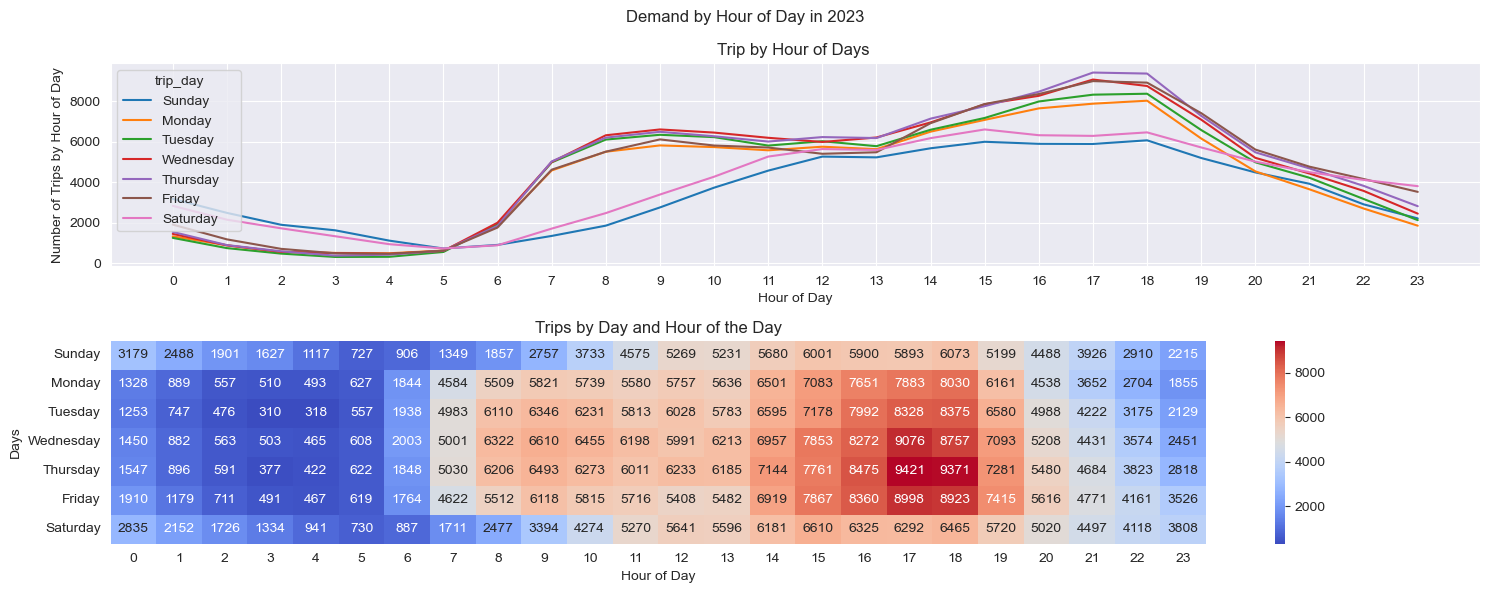

In [2237]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Hour of Day in 2023")

plt.subplot(2, 1, 1)
sns.lineplot(data= demand_time_day, x= "trip_hour_of_day", y= "demand_hour_day", hue= "trip_day")
plt.title("Trip by Hour of Days ")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips by Hour of Day")
plt.xticks(np.arange(0, 24, 1))

plt.subplot(2, 1, 2)
sns.heatmap(cross_time_day, cmap="coolwarm", annot=True, fmt='d')
plt.title('Trips by Day and Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Days')

plt.tight_layout()
plt.show()

**Insights**
- Throughout the year 2023, the high and low of the demand for green taxi is consistent.
- The lowest demand for green cab throughout the week in 2023 is from 1 am - 5 am, but the number of trips in weekend is above 1000 trips while in the weekdays the number of trips is 300 - 1000 trips .
- The peak demand for green cab throughout the week in 2023 is from 15 pm - 19 pm, but the number of trips in weekend is below 7000 trips while in the weekdays the number of trips are in the range of 7000 - 9000 trips.

- ### **Passenger Demand by Season**

In [2238]:
demand_season= df.groupby("trip_season", sort= False).agg(demand_by_season= ("trip_season", "count")).reset_index()
demand_season

,trip_season,demand_by_season
0,Winter,182961
1,Spring,191628
2,Summer,173105
3,Autumn,178996


In [2268]:
demand_season.to_csv("demand_season.csv", index= False)

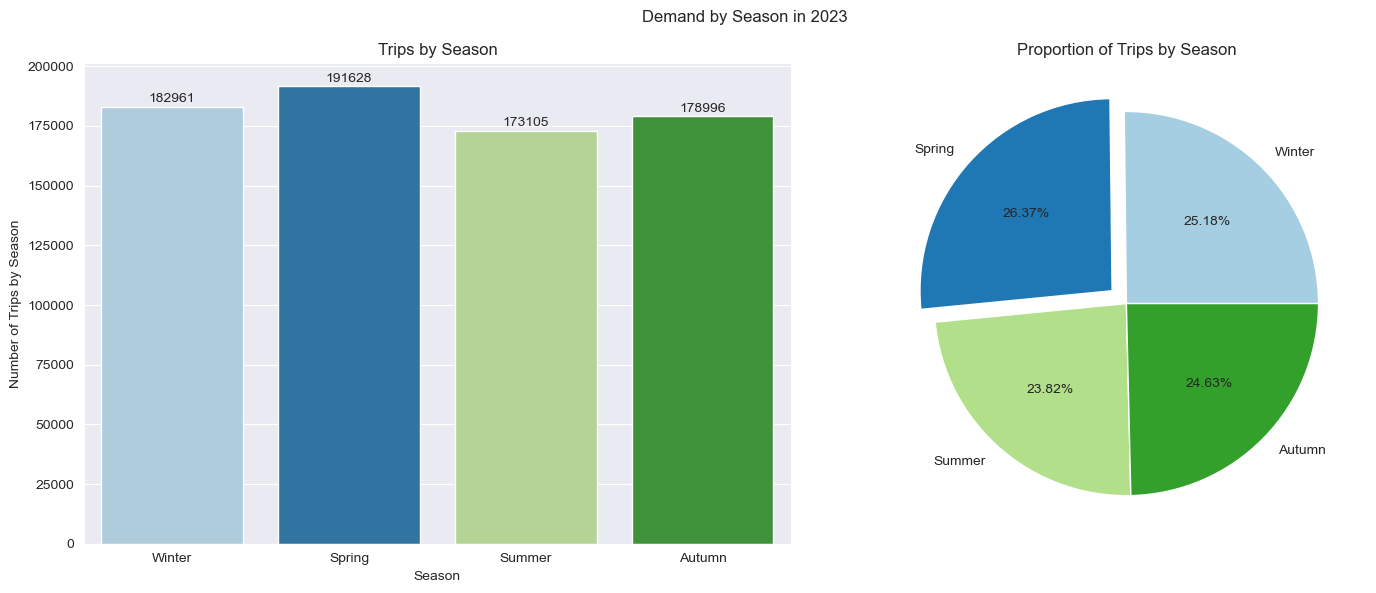

In [2239]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Season in 2023")
plt.subplot(1,2,1)
bars = sns.barplot(x = demand_season["trip_season"].unique().tolist(),
                   y = demand_season["demand_by_season"].unique().tolist(),
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 2000
    label = "{:.0f}".format(demand_season['demand_by_season'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.title("Trips by Season")
plt.xlabel("Season")
plt.ylabel("Number of Trips by Season")

plt.subplot(1,2,2)
plt.pie(demand_season["demand_by_season"],
        labels= demand_season["trip_season"],
        autopct= "%1.2f%%",
        explode=(0,0.1,0,0),
        colors= sns.color_palette("Paired"))
plt.title("Proportion of Trips by Season")

plt.tight_layout()
plt.show()

**Insights**
- Across all four season there isn't much difference for demand of green taxi with the difference of the peak demand and the lowest demand is 2.55%.
- Spring has the peak demand for green taxi with 191,628 trips or 26.37% of all trips.
- Summer has the lowest demand for green taxi with 173,105 trips or 23.82% of all trips.

In [2240]:
demand_spring= df[df["trip_season"] == "Spring"].groupby("trip_month", sort= False).agg(demand_by_spring= ("trip_month", "count")).reset_index()
demand_winter= df[df["trip_season"] == "Winter"].groupby("trip_month", sort= False).agg(demand_by_winter= ("trip_month", "count")).reset_index()
demand_autumn= df[df["trip_season"] == "Autumn"].groupby("trip_month", sort= False).agg(demand_by_autumn= ("trip_month", "count")).reset_index()
demand_summer= df[df["trip_season"] == "Summer"].groupby("trip_month", sort= False).agg(demand_by_summer= ("trip_month", "count")).reset_index()

In [2269]:
demand_spring.to_csv("demand_spring.csv", index= False)
demand_winter.to_csv("demand_winter.csv", index= False)
demand_autumn.to_csv("demand_autumn.csv", index= False)
demand_summer.to_csv("demand_summer.csv", index= False)

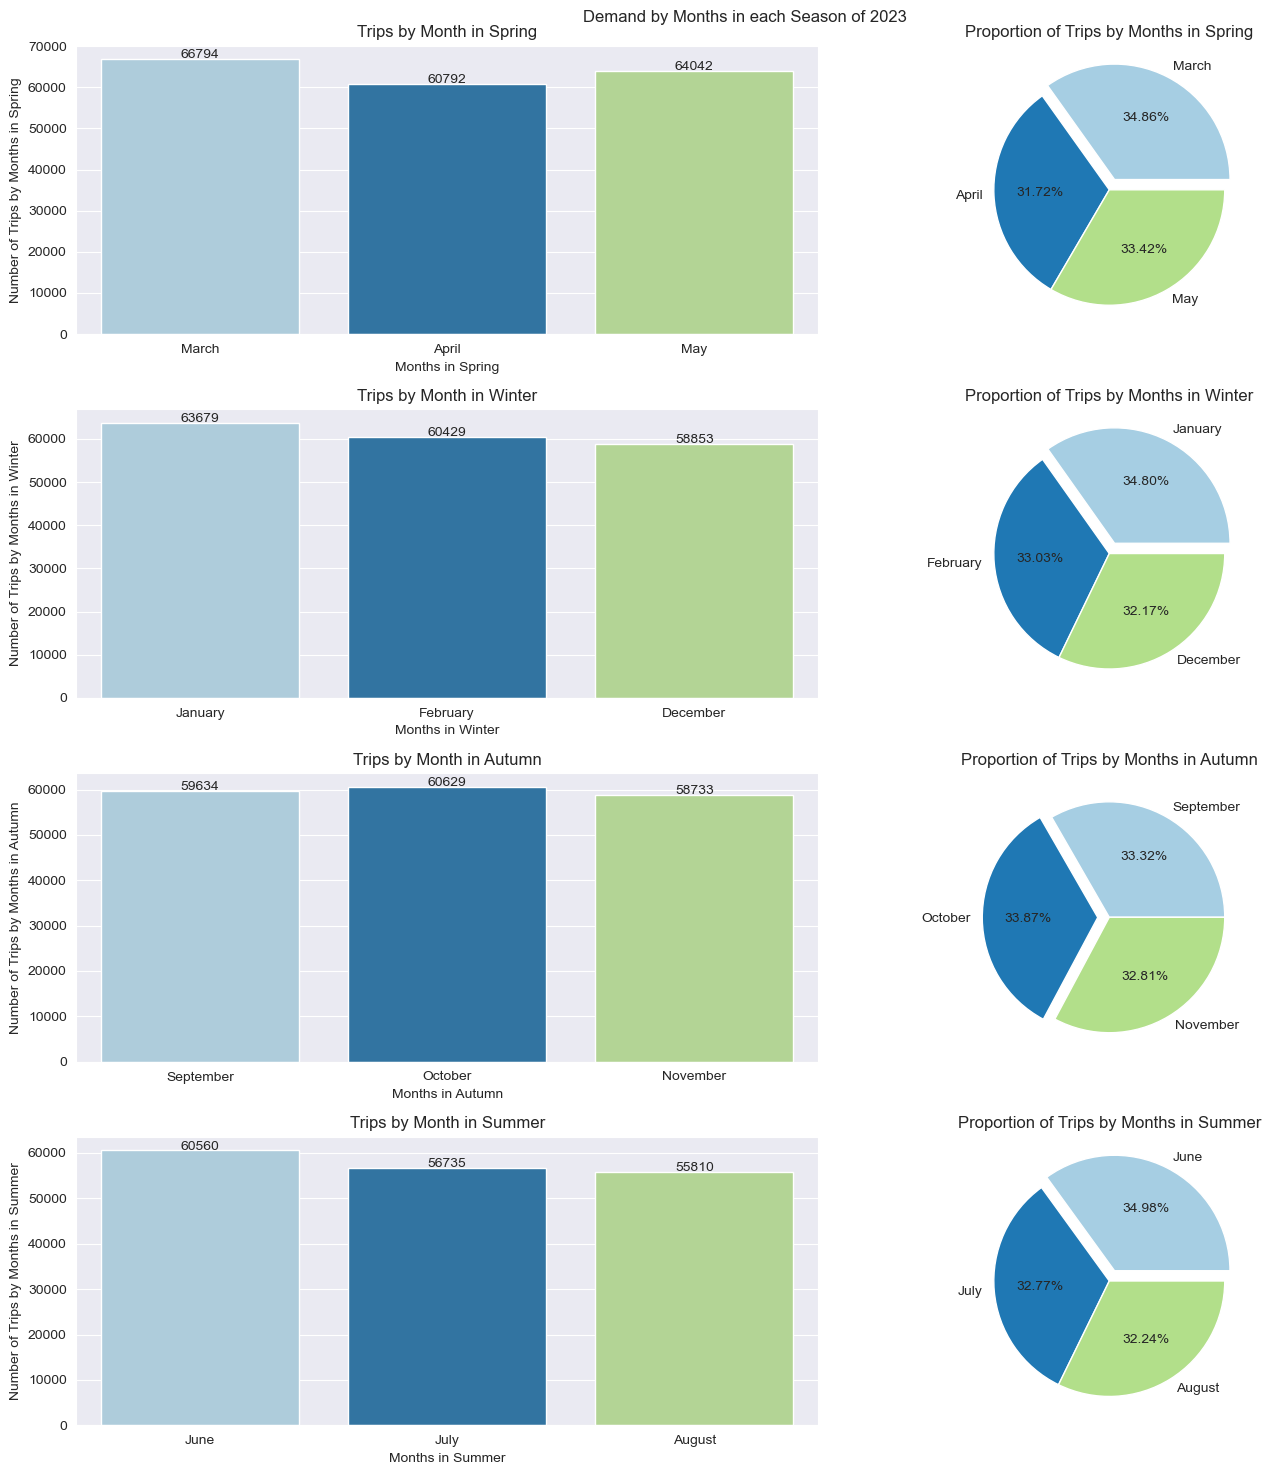

In [2241]:
plt.figure(figsize=(15,15))
plt.suptitle("Demand by Months in each Season of 2023")
plt.subplot(4,2,1)
bars = sns.barplot(x = demand_spring["trip_month"].unique().tolist(),
                   y = demand_spring["demand_by_spring"].unique().tolist(),
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(demand_spring['demand_by_spring'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.title("Trips by Month in Spring")
plt.xlabel("Months in Spring")
plt.ylabel("Number of Trips by Months in Spring")

plt.subplot(4,2,2)
plt.pie(demand_spring["demand_by_spring"],
        labels= demand_spring["trip_month"],
        autopct= "%1.2f%%",
        explode=(0.1,0,0),
        colors= sns.color_palette("Paired"))
plt.title("Proportion of Trips by Months in Spring")

plt.subplot(4,2,3)
bars = sns.barplot(x = demand_winter["trip_month"].unique().tolist(),
                   y = demand_winter["demand_by_winter"].unique().tolist(),
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(demand_winter['demand_by_winter'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.title("Trips by Month in Winter")
plt.xlabel("Months in Winter")
plt.ylabel("Number of Trips by Months in Winter")

plt.subplot(4,2,4)
plt.pie(demand_winter["demand_by_winter"],
        labels= demand_winter["trip_month"],
        autopct= "%1.2f%%",
        explode=(0.1,0,0),
        colors= sns.color_palette("Paired"))
plt.title("Proportion of Trips by Months in Winter")

plt.subplot(4,2,5)
bars = sns.barplot(x = demand_autumn["trip_month"].unique().tolist(),
                   y = demand_autumn["demand_by_autumn"].unique().tolist(),
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(demand_autumn['demand_by_autumn'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.title("Trips by Month in Autumn")
plt.xlabel("Months in Autumn")
plt.ylabel("Number of Trips by Months in Autumn")

plt.subplot(4,2,6)
plt.pie(demand_autumn["demand_by_autumn"],
        labels= demand_autumn["trip_month"],
        autopct= "%1.2f%%",
        explode=(0,0.1,0),
        colors= sns.color_palette("Paired"))
plt.title("Proportion of Trips by Months in Autumn")

plt.subplot(4,2,7)
bars = sns.barplot(x = demand_summer["trip_month"].unique().tolist(),
                   y = demand_summer["demand_by_summer"].unique().tolist(),
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(demand_summer['demand_by_summer'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
plt.title("Trips by Month in Summer")
plt.xlabel("Months in Summer")
plt.ylabel("Number of Trips by Months in Summer")

plt.subplot(4,2,8)
plt.pie(demand_summer["demand_by_summer"],
        labels= demand_summer["trip_month"],
        autopct= "%1.2f%%",
        explode=(0.1,0,0),
        colors= sns.color_palette("Paired"))
plt.title("Proportion of Trips by Months in Summer")

plt.tight_layout()
plt.show()

**Insights**
1. Spring
    - Across all months in Spring there isn't much difference for demand of green taxi with the difference of the peak demand and the lowest demand is 3.14%.
    - Peak demand for green taxi is in March with 66,794 trips or 34.86% of all trips in Spring
    - Lowest demand for green taxi is in April with 60,792 trips or 31.72% of all trips in Spring

1. Winter
    - Across all months in Winter there isn't much difference for demand of green taxi with the difference of the peak demand and the lowest demand is  2.63%.
    - Peak demand for green taxi is in January with 63,679 trips or 34.80% of all trips in Winter
    - Lowest demand for green taxi is in December with 58,853 trips or 32.17% of all trips in Winter

1. Autumn
    - Across all months in Autumn there isn't much difference for demand of green taxi with the difference of the peak demand and the lowest demand is 1.06%.
    - Peak demand for green taxi is in October with 60,629 trips or 33.87% of all trips in Autumn
    - Lowest demand for green taxi is in November with 58,733 trips or 32.81% of all trips in Autumn

1. Summer
    - Across all months in Summer there isn't much difference for demand of green taxi with the difference of the peak demand and the lowest demand is 2.74%.
    - Peak demand for green taxi is in June with 60,560 trips or 34.98% of all trips in Summer
    - Lowest demand for green taxi is in August with 55,810 trips or 32.24% of all trips in Summer


## **3. Identify Peak Passenger Demand by Location and Time**

- #### **By Borough and Month**

In [2242]:
demand_borough_month = df[["PUBorough", "trip_month"]].groupby(["PUBorough", "trip_month"], as_index= False, sort= False).agg(demand_by_borough_month = ("trip_month", "count"))
demand_borough_month.sample(3)

,PUBorough,trip_month,demand_by_borough_month
27,Manhattan,June,34431
51,Brooklyn,November,7674
17,Brooklyn,April,7965


In [2270]:
demand_borough_month.to_csv("demand_borough_month.csv", index= False)

In [2243]:
borough_order = ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"]
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
cross_borough_month = pd.crosstab(index= df["PUBorough"], columns= df["trip_month"]).reindex(index= borough_order, columns= month_order)
cross_borough_month

trip_month,January,February,March,April,May,June,July,August,September,October,November,December
PUBorough,,,,,,,,,,,,
Manhattan,37839,35980,40252,36400,38629,34431,31832,31397,33001,36183,35055,34254
Queens,16336,15241,16306,15189,15814,15888,14928,15051,17387,15373,15107,15066
Brooklyn,8460,8169,8827,7965,8229,8897,8593,8116,8163,8205,7674,8593
Bronx,1034,1037,1407,1233,1362,1339,1371,1240,1083,861,888,939
Staten Island,10,2,2,5,8,5,11,6,0,7,9,1


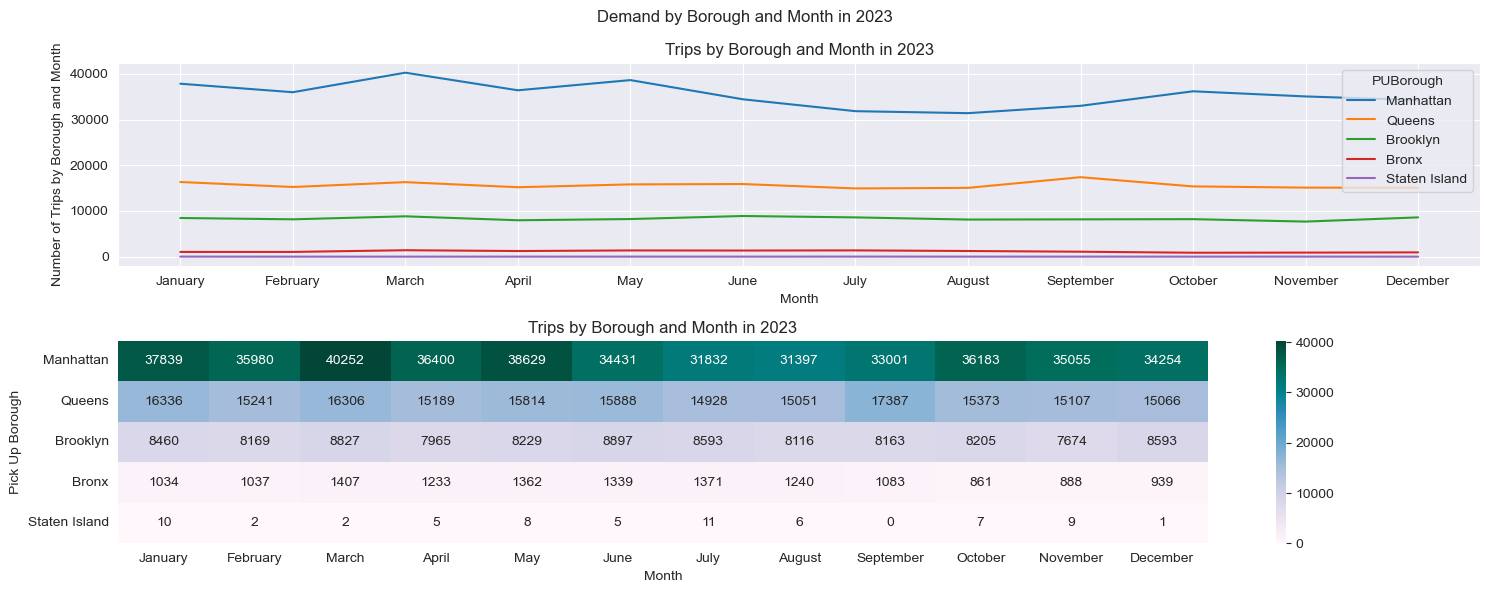

In [2244]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Borough and Month in 2023")

plt.subplot(2, 1, 1)
sns.lineplot(data= demand_borough_month, x= "trip_month", y= "demand_by_borough_month", hue= "PUBorough")
plt.title('Trips by Borough and Month in 2023')
plt.xlabel("Month")
plt.ylabel("Number of Trips by Borough and Month")

plt.subplot(2, 1, 2)
sns.heatmap(cross_borough_month, cmap="PuBuGn", annot=True, fmt='d')
plt.title('Trips by Borough and Month in 2023')
plt.xlabel('Month')
plt.ylabel('Pick Up Borough')

plt.tight_layout()
plt.show()

**Insights**
- The demand for green taxi in Manhattan fluctuate throught the year, while the other four borough has a relatively stagnant demand on green taxi.
- The peak demand for green is in March at Manhattan with 40,252 trips.
- The lowest demand for green taxi is in September at Staten Island with 0 trips.

- #### **By Borough and Days**

In [2245]:
demand_borough_days = df[["PUBorough", "trip_day"]].groupby(["PUBorough", "trip_day"], as_index= False, sort= False).agg(demand_by_borough_month = ("trip_day", "count"))
demand_borough_days.sample(3)

,PUBorough,trip_day,demand_by_borough_month
8,Queens,Tuesday,25983
28,Bronx,Saturday,1759
16,Staten Island,Wednesday,16


In [2271]:
demand_borough_days.to_csv("demand_borough_days.csv", index= False)

In [2246]:
cross_borough_day= pd.crosstab(index= df["PUBorough"], columns= df["trip_day"]).reindex(index= borough_order, columns= day_order)
cross_borough_day

trip_day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
PUBorough,,,,,,,
Manhattan,44465,62671,66242,69024,69524,66018,47309
Queens,22502,24255,25983,28378,29563,29843,27162
Brooklyn,16510,12054,12376,13330,13765,14086,17770
Bronx,1521,1942,1845,2188,2127,2412,1759
Staten Island,3,10,9,16,13,11,4


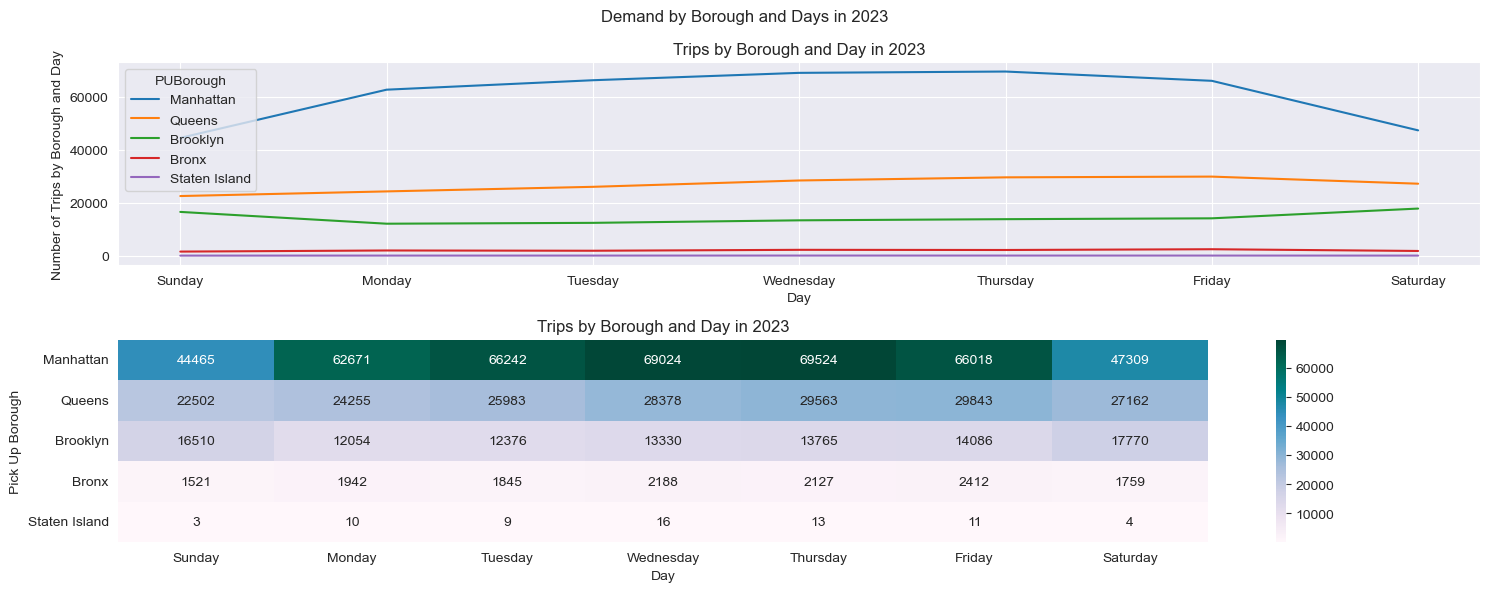

In [2247]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Borough and Days in 2023")

plt.subplot(2, 1, 1)
sns.lineplot(data= demand_borough_days, x= "trip_day", y= "demand_by_borough_month", hue= "PUBorough")
plt.title('Trips by Borough and Day in 2023')
plt.xlabel("Day")
plt.ylabel("Number of Trips by Borough and Day")

plt.subplot(2, 1, 2)
sns.heatmap(cross_borough_day, cmap="PuBuGn", annot=True, fmt='d')
plt.title('Trips by Borough and Day in 2023')
plt.xlabel('Day')
plt.ylabel('Pick Up Borough')

plt.tight_layout()
plt.show()

**Insights**
- Peak demand for green taxi is in Thursday at Manhattan with 69,524 trips
- Lowest demand for green taxi is in Sunday at Staten Island with 3 trpis
- Manhattan, Queens, Bronx, Staten Island has higher demand for green taxi in weekday than in weekend throughout 2023.
- Brooklyn has higher demand for green taxi in weekend than in weekday throughout 2023.

- #### **By Borough and Hour of Day**

In [2248]:
demand_borough_hour = df[["PUBorough", "trip_hour_of_day"]].groupby(["PUBorough", "trip_hour_of_day"], as_index= False, sort= False).agg(demand_by_borough_hour = ("trip_hour_of_day", "count"))
demand_borough_hour.sample(3)

,PUBorough,trip_hour_of_day,demand_by_borough_hour
16,Manhattan,4,766
45,Brooklyn,13,5209
91,Bronx,22,634


In [2273]:
demand_borough_hour.to_csv("demand_borough_hour.csv", index= False)

In [2249]:
cross_borough_hour= pd.crosstab(index= df["PUBorough"], columns= df["trip_hour_of_day"]).reindex(index= borough_order)
cross_borough_hour

trip_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
PUBorough,,,,,,,,,,,,,,,,,,,,,,,,
Manhattan,4164,2362,1328,811,766,1572,7858,20567,24134,25975,25864,25425,25631,24622,28819,31538,32236,33192,32529,25313,18378,14393,10415,7361
Queens,5825,4086,2872,2688,2248,1840,2085,4183,6162,6980,7384,8131,8719,9383,10526,12088,13923,15508,15492,12626,10248,9356,8345,6988
Brooklyn,3123,2559,2148,1504,990,707,1055,2265,3060,3695,4320,4626,5055,5209,5709,5876,6060,6538,7355,6967,6250,5774,5070,3976
Bronx,390,226,177,149,219,368,192,265,633,887,952,977,918,912,918,848,742,642,609,538,462,659,634,477
Staten Island,0,0,0,0,0,3,0,0,4,2,0,4,4,0,5,3,14,11,9,5,0,1,1,0


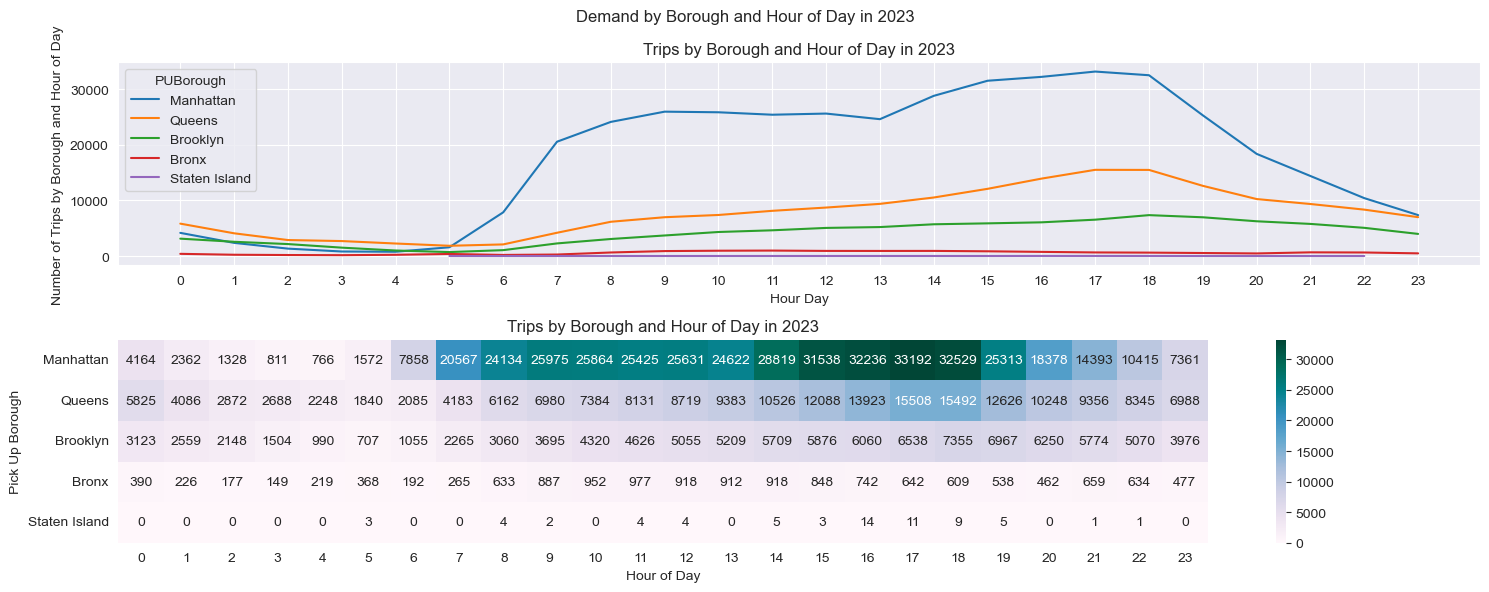

In [2250]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Borough and Hour of Day in 2023")

plt.subplot(2, 1, 1)
sns.lineplot(data= demand_borough_hour, x= "trip_hour_of_day", y= "demand_by_borough_hour", hue= "PUBorough")
plt.title('Trips by Borough and Hour of Day in 2023')
plt.xlabel("Hour Day")
plt.ylabel("Number of Trips by Borough and Hour of Day")
plt.xticks(np.arange(0, 24, 1))

plt.subplot(2, 1, 2)
sns.heatmap(cross_borough_hour, cmap="PuBuGn", annot=True, fmt='d')
plt.title('Trips by Borough and Hour of Day in 2023')
plt.xlabel('Hour of Day')
plt.ylabel('Pick Up Borough')

plt.tight_layout()
plt.show()

**Insights**
- Peak demand for green taxi is in 15 pm - 19 pm at Manhattan with above 25,000 trips.
- Lowest demand for green taxi at Staten Island with multiple zero trips throughout the day.
- Manhattan has a really fluctuative demand.
- Queens, Brooklyn, Bronx has a relatively stable increase and decrease demand.
- Staten Island has an extremely low demand.

- #### **By Borough and Season**

In [2251]:
demand_borough_season = df[["PUBorough", "trip_season"]].groupby(["PUBorough", "trip_season"], as_index= False).agg(trip_borough_season = ("trip_season", "count"))
demand_borough_season

,PUBorough,trip_season,trip_borough_season
0,Bronx,Autumn,2832
1,Bronx,Spring,4002
2,Bronx,Summer,3950
3,Bronx,Winter,3010
4,Brooklyn,Autumn,24042
5,Brooklyn,Spring,25021
6,Brooklyn,Summer,25606
7,Brooklyn,Winter,25222
8,Manhattan,Autumn,104239
9,Manhattan,Spring,115281


In [2274]:
demand_borough_season.to_csv("demand_borough_season.csv", index= False)

In [2252]:
season_order = ["Winter", "Spring", "Summer", "Autumn"]
cross_borough_season= pd.crosstab(index= df["PUBorough"], columns= df["trip_season"]).reindex(index= borough_order, columns= season_order)
cross_borough_season

trip_season,Winter,Spring,Summer,Autumn
PUBorough,,,,
Manhattan,108073,115281,97660,104239
Queens,46643,47309,45867,47867
Brooklyn,25222,25021,25606,24042
Bronx,3010,4002,3950,2832
Staten Island,13,15,22,16


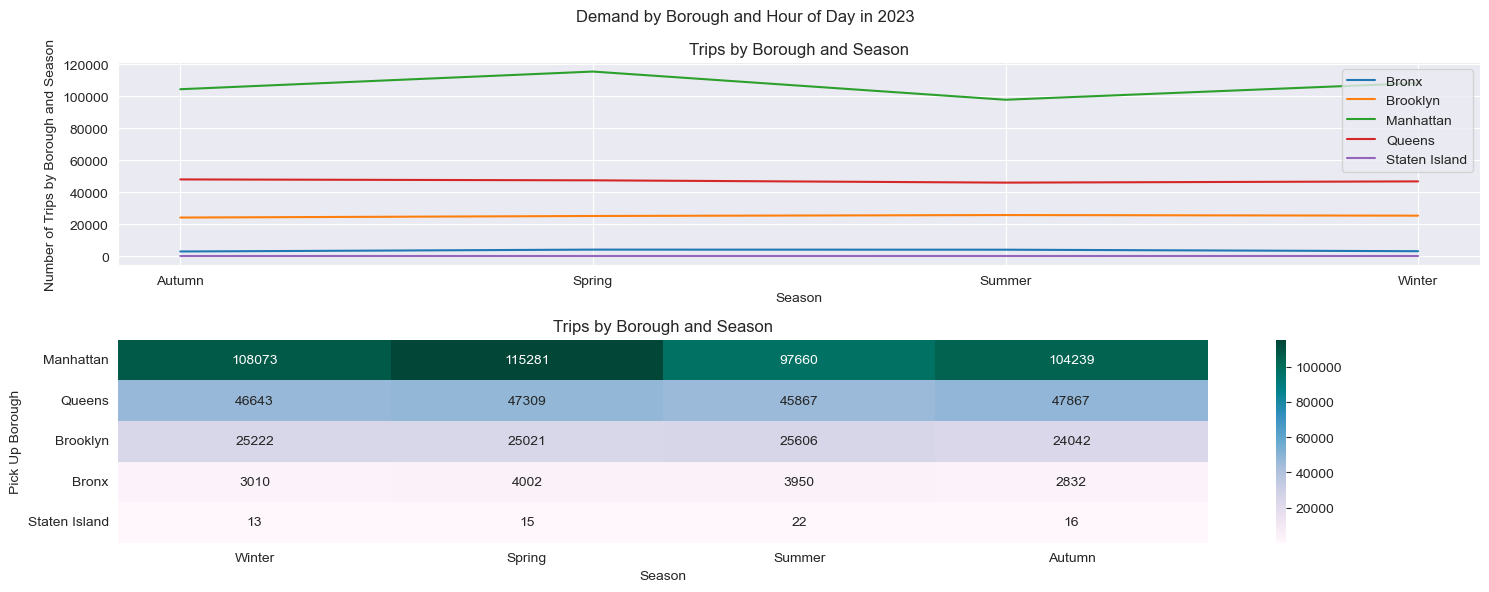

In [2253]:
plt.figure(figsize=(15,6))

plt.suptitle("Demand by Borough and Hour of Day in 2023")

plt.subplot(2, 1, 1)
sns.lineplot(data= demand_borough_season, x= "trip_season", y= "trip_borough_season", hue= "PUBorough")
plt.title('Trips by Borough and Season')
plt.xlabel("Season")
plt.ylabel("Number of Trips by Borough and Season")
plt.legend(loc= "upper right")

plt.subplot(2, 1, 2)
sns.heatmap(cross_borough_season, cmap="PuBuGn", annot=True, fmt='d')
plt.title('Trips by Borough and Season')
plt.xlabel('Season')
plt.ylabel('Pick Up Borough')

plt.tight_layout()
plt.show()

**Insights**
- By seasons, Manhattan is the only borough with visible fluctuation with the peak demand in spring with 115,281 trips and the lowest demand in autumn with 97,660 trips.
- The other four borough shows a stable demand throughout the seasons
- Peak demand is in Spring at Manhattan with 115,281 trips, while the lowest demand is in Winter at Staten Island with 13 trips recorded.

## **4. Identify The Wait Time for Trip**

In [2254]:
borough_metrics = df.groupby('PUBorough').agg(avg_trip_duration= ("trip_duration", "mean")).sort_values(by= "avg_trip_duration", ascending= False).reset_index()
borough_metrics

,PUBorough,avg_trip_duration
0,Brooklyn,20.214699
1,Staten Island,20.065606
2,Bronx,19.776293
3,Queens,15.538080
4,Manhattan,13.320445


In [2275]:
borough_metrics.to_csv("borough_metrics.csv", index= False)

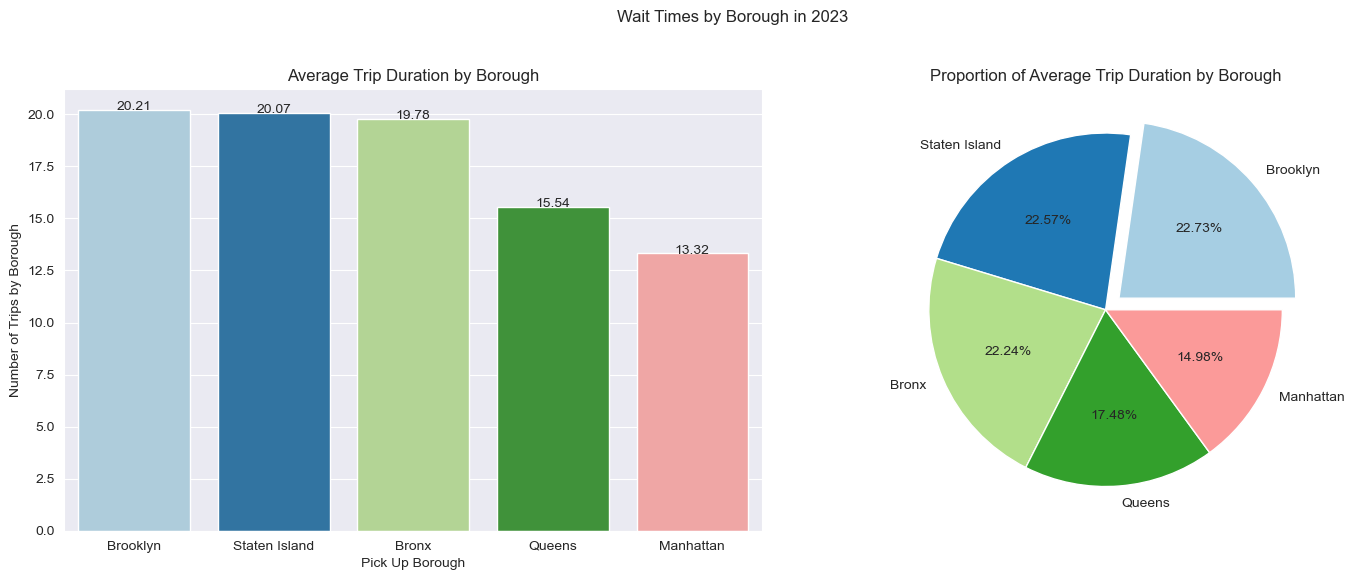

In [2278]:
plt.figure(figsize=(15,6))

plt.suptitle("Wait Times by Borough in 2023")

plt.subplot(1,2,1)
bars = sns.barplot(x=borough_metrics['PUBorough'], 
                   y=borough_metrics['avg_trip_duration'], 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height()
    label = "{:.2f}".format(borough_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Trip Duration by Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Number of Trips by Borough')

plt.subplot(1,2,2)
plt.pie(borough_metrics["avg_trip_duration"],
        labels= borough_metrics["PUBorough"],
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Average Trip Duration by Borough")

plt.tight_layout(pad= 2)
plt.show()

**Insights**
- The longest wait time for green taxi is in Brooklyn with the average trip duration is 20.21 minutes or 22.73% of total average trip duration in all boroughs
- The shortest wait time for green taxi is in Manhattan with the average trip duration is 13 minutes or 14.98% of total average trip duration in all boroughs. 

In [2256]:
zone_metrics = df.groupby(['PUBorough', 'PUZone']).agg(avg_trip_duration= ("trip_duration", "mean")).sort_values(by= "avg_trip_duration", ascending= False).reset_index()
zone_metrics.sample()

,PUBorough,PUZone,avg_trip_duration
50,Brooklyn,Stuyvesant Heights,26.17639


In [2276]:
manhattan_metrics = zone_metrics[zone_metrics["PUBorough"] == "Manhattan"].head()
queens_metrics = zone_metrics[zone_metrics["PUBorough"] == "Queens"].head()
brooklyn_metrics = zone_metrics[zone_metrics["PUBorough"] == "Brooklyn"].head()
bronx_metrics = zone_metrics[zone_metrics["PUBorough"] == "Bronx"].head()
staten_metrics = zone_metrics[zone_metrics["PUBorough"] == "Staten Island"].head()

In [2277]:
manhattan_metrics.to_csv("manhattan_metrics.csv", index= False)
queens_metrics.to_csv("queens_metrics.csv", index= False)
brooklyn_metrics.to_csv("brooklyn_metrics.csv", index= False)
bronx_metrics.to_csv("bronx_metrics.csv", index= False)
staten_metrics.to_csv("staten_metrics.csv", index= False)

In [2258]:
display(manhattan_metrics.head(),
        queens_metrics.head(),
        brooklyn_metrics.head(),
        bronx_metrics.head(),
        staten_metrics.head())

,PUBorough,PUZone,avg_trip_duration
4,Manhattan,Midtown Center,44.600000
9,Manhattan,Financial District South,37.166667
11,Manhattan,Hudson Sq,36.000000
25,Manhattan,East Village,30.000000
26,Manhattan,Roosevelt Island,29.810085


,PUBorough,PUZone,avg_trip_duration
7,Queens,Far Rockaway,41.434615
8,Queens,Hammels/Arverne,40.679167
16,Queens,Rockaway Park,32.881538
19,Queens,Ozone Park,31.431489
24,Queens,Bay Terrace/Fort Totten,30.677600


,PUBorough,PUZone,avg_trip_duration
1,Brooklyn,Ocean Parkway South,68.539315
2,Brooklyn,Flatlands,45.999800
3,Brooklyn,Midwood,44.725543
5,Brooklyn,Coney Island,43.109848
10,Brooklyn,Homecrest,36.644183


,PUBorough,PUZone,avg_trip_duration
13,Bronx,City Island,34.720833
43,Bronx,Eastchester,27.051605
45,Bronx,Bronx Park,26.911892
53,Bronx,Country Club,25.750000
54,Bronx,Crotona Park,25.742727


,PUBorough,PUZone,avg_trip_duration
0,Staten Island,Oakwood,68.885
6,Staten Island,South Beach/Dongan Hills,41.940
14,Staten Island,Grymes Hill/Clifton,34.160
18,Staten Island,Heartland Village/Todt Hill,31.730
36,Staten Island,Westerleigh,27.770


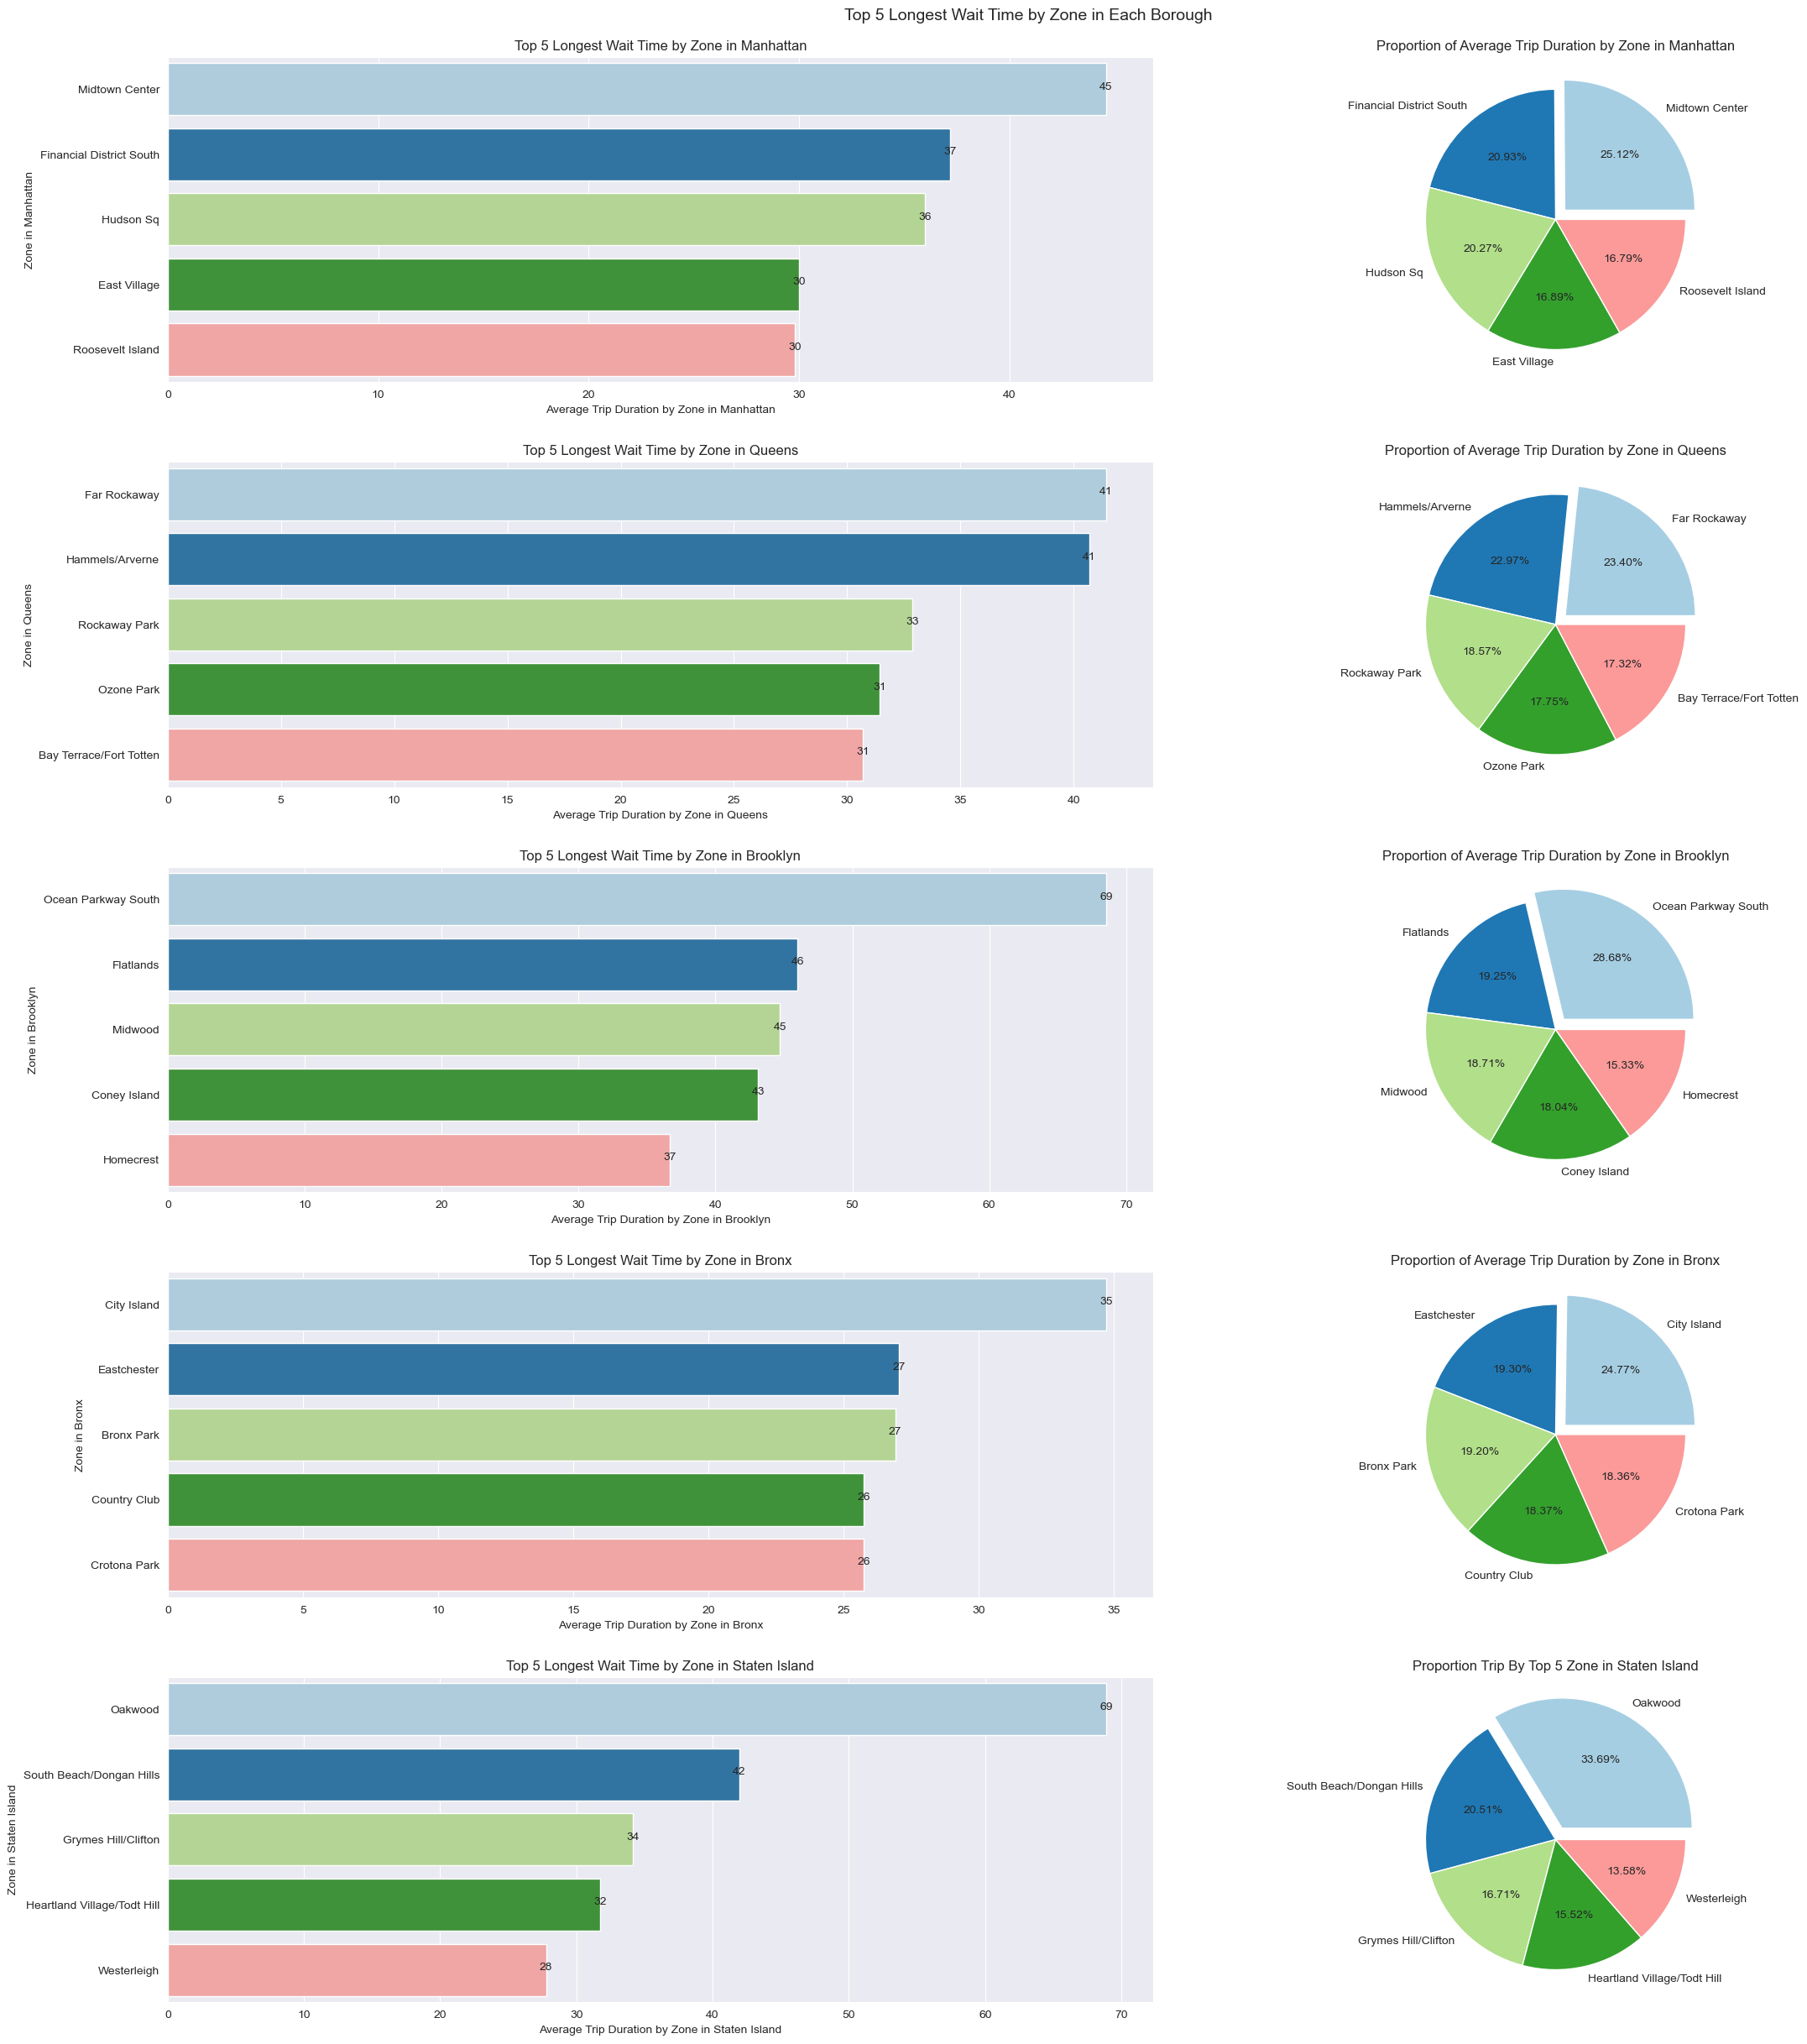

In [2279]:
plt.figure(figsize=(25, 25))

plt.suptitle("Top 5 Longest Wait Time by Zone in Each Borough", fontsize= 14)

plt.subplot(5,2,1)
bars = sns.barplot(data=manhattan_metrics.head(),
                   y='PUZone', 
                   x='avg_trip_duration', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width()
    label = "{:.0f}".format(manhattan_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Top 5 Longest Wait Time by Zone in Manhattan")
plt.ylabel("Zone in Manhattan")
plt.xlabel("Average Trip Duration by Zone in Manhattan")

plt.subplot(5,2,2)
plt.pie(manhattan_metrics["avg_trip_duration"].head(),
        labels= manhattan_metrics["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Average Trip Duration by Zone in Manhattan")

plt.subplot(5,2,3)
bars = sns.barplot(data=queens_metrics.head(),
                   y='PUZone', 
                   x='avg_trip_duration', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() 
    label = "{:.0f}".format(queens_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Top 5 Longest Wait Time by Zone in Queens")
plt.ylabel("Zone in Queens")
plt.xlabel("Average Trip Duration by Zone in Queens")

plt.subplot(5,2,4)
plt.pie(queens_metrics["avg_trip_duration"].head(),
        labels= queens_metrics["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Average Trip Duration by Zone in Queens")

plt.subplot(5,2,5)
bars = sns.barplot(data=brooklyn_metrics.head(),
                   y='PUZone', 
                   x='avg_trip_duration', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() 
    label = "{:.0f}".format(brooklyn_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Top 5 Longest Wait Time by Zone in Brooklyn")
plt.ylabel("Zone in Brooklyn")
plt.xlabel("Average Trip Duration by Zone in Brooklyn")

plt.subplot(5,2,6)
plt.pie(brooklyn_metrics["avg_trip_duration"].head(),
        labels= brooklyn_metrics["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Average Trip Duration by Zone in Brooklyn")

plt.subplot(5,2,7)
bars = sns.barplot(data=bronx_metrics.head(),
                   y='PUZone', 
                   x='avg_trip_duration', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() 
    label = "{:.0f}".format(bronx_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Top 5 Longest Wait Time by Zone in Bronx")
plt.ylabel("Zone in Bronx")
plt.xlabel("Average Trip Duration by Zone in Bronx")

plt.subplot(5,2,8)
plt.pie(bronx_metrics["avg_trip_duration"].head(),
        labels= bronx_metrics["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion of Average Trip Duration by Zone in Bronx")

plt.subplot(5,2,9)
bars = sns.barplot(data=staten_metrics.head(),
                   y='PUZone', 
                   x='avg_trip_duration', 
                   palette= "Paired")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() 
    label = "{:.0f}".format(staten_metrics['avg_trip_duration'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title("Top 5 Longest Wait Time by Zone in Staten Island")
plt.ylabel("Zone in Staten Island")
plt.xlabel("Average Trip Duration by Zone in Staten Island")

plt.subplot(5,2,10)
plt.pie(staten_metrics["avg_trip_duration"].head(),
        labels= staten_metrics["PUZone"].head(),
        autopct= "%1.2f%%",
        explode=(0.1,0,0,0,0),
        colors= sns.color_palette("Paired"))

plt.title("Proportion Trip By Top 5 Zone in Staten Island")

plt.tight_layout(pad= 2.5)
plt.show()

**Insights**
- Manhattan:
    The peak wait time is in Midtown Center with 45 minutes wait time or 25.12% of total wait time in top 5 zone of Manhattan, while the lowest wait time is in Roosevelt Island with 30 minutes wait time or 16.79% of total wait time in top 5 zone of Manhattan, so the difference between the peak and the lowest wait time is 15 minutes or 8.33% in difference. 

- Queens:
    The peak wait time is in Far Rockaway with 41 minutes wait time or 23.40% of total wait time in top 5 zone of Queens, while the lowest wait time is in Bay Terrace with 31 minutes wait time or 17.32% of total wait time in top 5 zone of Queens, so the difference between the peak and the lowest wait time is only 10 minutes or 6.08% in difference.

- Brooklyn:
    The peak wait time is in Ocean Parkway South with 69 minutes wait time or 28.68% of total wait time in top 5 zone of Brooklyn, while the lowest wait time is in Homecrest with 37 minutes wait time or 15.33% of total wait time in top 5 zone of Brooklyn, so the difference between the peak and the lowest wait time is 32 minutes or 13.35% in difference.

- Bronx:
    The peak wait time is in City Island with 35 minutes wait time or 24.77% of total wait time in top 5 zone of Bronx, while the lowest wait time is in Crotona Park with 26 minutes wait time or 18.36% of total wait time in top 5 zone of Bronx, so the difference between the peak and the lowest wait time is 9 minutes or 6.41% in difference.

- Staten Island:
    The peak wait time is in Oakwood with 69 minutes wait time or 33.69% of total wait time in top 5 zone of Staten Island, while the lowest wait time is in Westerleigh with 28 minutes wait time or 13.58% of total wait time in top 5 zone of Staten Island, so the difference between the peak and the lowest wait time is 41 minutes or 20.11% in difference.

> # **Conclusion and Recommendation**
---

## **Conclusion**

**Identify Peak Passenger Location**

- Manhattan has the highest demand, accounting for nearly 60% of total green taxi trips, with East Harlem North being the most popular pickup zone within the borough.

-  Queens, Brooklyn, the Bronx, and Staten Island have lower overall demand, however certain zones still show strong demand within these boroughs. For instance, Forest Hills in Queens

- Low-demand zones, like Staten Island's Port Richmond and Bronx's Highbridge, indicate areas where fewer taxis may be needed.

**Identify Peak Passenger by Time**

- Green taxi demand is relatively stable across seasons, with a marginal difference of only 2.55% between the highest (Spring) and lowest (Summer) demand.

- Monthly demand fluctuates within each season. For example, Spring’s demand peaks in March, while Summer's demand is highest in June.

- Demand varies across the week, with a notable dip on Sundays. Thursday sees the highest weekday demand, indicating that additional resources on Thursdays could improve service availability.

- The most pronounced trend is the difference in demand across daily hours, with peak periods between 15 pm and 19 pm. Demand is also higher during this time on weekdays compared to weekends.

**Identify Peak Passenger Demand by Location and Time**

- Manhattan consistently shows the highest demand for green taxis, with demand peaking in March and again from Thursday through early evenings (15 pm - 19 pm) across the week

- Other boroughs like Queens, Bronx, and Staten Island show relatively stable, low demand throughout the year, with Staten Island occasionally recording zero trips.

- Brooklyn shows a unique pattern, with higher demand on weekends, suggesting a possible trend of increased leisure travel.

- Seasonally, only Manhattan shows distinct demand fluctuations, with Spring having the highest demand and Autumn the lowest. The other boroughs remain stable, indicating that Manhattan’s demand may be more sensitive to seasonal factors

**Identify The Wait Time for Trip**

- The analysis indicates that areas with higher trip densities, like Manhattan, experience shorter wait times due to continuous demand. In contrast, boroughs with lower demand, such as Staten Island and parts of Brooklyn, face longer wait times, with significant variability between specific zones.

**General Conclusion:** <br>

The analysis highlights that **green taxi operations are most efficient and in highest demand within Manhattan**, particularly during weekday afternoons and in the spring season. In other boroughs, particularly Staten Island and parts of Brooklyn, **lower demand correlates with longer wait times, pointing to potential inefficiencies and opportunities for optimized taxi distribution.** This suggests that a dynamic, demand-based approach to taxi allocation could improve service efficiency, reducing wait times in low-demand zones and ensuring more balanced availability across NYC.

## **Recommendation**

Based on the conclusions, here’s an actionable plan for distributing green cab licenses effectively to meet passenger demand:
1. **Demand-Based Licensing Allocation:**

    - Concentrate Licenses in High-Demand Boroughs and Zones, focus on zones with consistently high passenger volume, using the trip data to prioritize the high-demand zones within each borough

    -  Adjust the number of licenses issued in each borough based on seasonal and daily demand patterns. For example, increasing licenses in Queens and Manhattan during spring, when demand surges, would ensure more cabs are available when needed.

2. **Flexible Licensing for Seasonal Demand:**

    - Seasonal Licensing, Issue temporary licenses for drivers willing to work during peak demand periods, like spring or specific months with high demand (e.g., March). This approach ensures sufficient coverage during high-demand seasons without oversupplying the market in low-demand months.

    - Reduced Licensing in Low-Demand Periods, to manage fleet size during low-demand months, such as August, consider incentives for drivers to temporarily reduce active licenses. This could be balanced by redistributing or suspending licenses to maintain optimal green cab supply based on current demand patterns.

3. **Strategic Incentive Program for Low-Demand Zones:**

    - Specialized Licensing for Under-Served Zones: In areas like Staten Island and specific low-demand zones in the Bronx, offer specialized licenses that come with additional incentives, such as reduced tax. These incentives can help fill demand gaps and ensure coverage in historically low-demand areas.

    - Flexible Licensing with Borough-Based Requirements, For neighborhoods with high peak-hour needs but low overall demand, grant flexible, limited-scope licenses that allow drivers to work exclusively during peak times or high-demand hours. This strategy can optimize driver availability during periods when demand surges in each borough.

4. **Performance-Based License Renewal:**

    - Renew Licenses Based on Service Metrics, Introduce a performance-based license renewal program where licenses are more readily renewed for drivers who have a proven record of servicing high-demand zones or peak hours.

    - Revise License Renewal for Low-Demand Areas, Encourage renewals in under-served areas by offering drivers who operate consistently in boroughs like Staten Island or during low-demand hours more favorable renewal terms, thus ensuring these areas remain serviced without a permanent oversupply of cabs.